<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [7]:
#Importation de la librairie Pandas
import pandas as pd

In [8]:
#Importation de la librairie plotly express
import plotly.express as px

In [9]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

# Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [11]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

C:\Users\Willkommen\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Willkommen\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Willkommen\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [15]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [16]:
#Afficher les 5 premières lignes de la table
df_erp.head()

product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [17]:
#Je renomme la colonne product_id et je modifie son type en 'object'
df_erp.rename(columns={'product_id': 'product_id_erp'}, inplace=True)
df_erp['product_id_erp'] = df_erp['product_id_erp'].astype('object')

In [18]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp.duplicated(subset=["product_id_erp"]).sum()

0

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px; ">Je constate qu'il n'y a pas de doublon dans la colonne product_id_erp</h3>
</div>

In [20]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp["stock_status"].unique()
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# à la colonne stock_quantity

array(['instock', 'outofstock'], dtype=object)

In [21]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "instock" if x > 0 else "outofstock")

In [22]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [23]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
comparaison = df_erp["stock_status"] == df_erp["stock_status_2"]
somme_identique = comparaison.sum()
# Affichage du résultat
print(f"Nombre de lignes identiques: {somme_identique}")
print(f"Nombre total de lignes: {len(df_erp)}")

Nombre de lignes identiques: 823
Nombre total de lignes: 825


In [24]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
# Filtrer les lignes où les colonnes ne sont pas identiques
differences = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]
print(differences)

    product_id_erp  onsale_web  price  stock_quantity stock_status  \
4             4039           1   46.0               3   outofstock   
398           4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  


In [25]:
#Corriger la ou les données incohérentes
# Corriger la colonne 'stock_status' avec les valeurs de 'stock_status_2' où il y a des incohérences
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status"] = df_erp["stock_status_2"]

#Verification en utilisant le même code que plus haut pour afficher les problemes
comparaison = df_erp["stock_status"] == df_erp["stock_status_2"]
print(f"Nombre de lignes identiques après correction: {comparaison.sum()}")

Nombre de lignes identiques après correction: 825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [28]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isnull())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
min_price = df_erp['price'].min()
print("Le prix minimum est: {}".format(min_price))
#Afficher le prix maximum de la colonne "price"
max_price = df_erp['price'].max()
print("Le prix maximum est: {}".format(max_price))
#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
#df_erp[df_erp['price'] < 0]
price_error = df_erp[df_erp['price'] < 0]
print(price_error)

Nombres d'article avec un prix non renseignés: 0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Name: price, Length: 825, dtype: bool
Le prix minimum est: -20.0
Le prix maximum est: 225.0
    product_id_erp  onsale_web  price  stock_quantity stock_status  \
151           4233           0  -20.0               0   outofstock   
469           5017           0   -8.0               0   outofstock   
739           6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">En parcourant le purchase_price, on peut s'apercevoir que le price est régulièrement le double du purchase_price. Dès lors, je considère que le price négatif est une erreur de saisie et qu'elle peut être corrigée en price positif pour continuer mon analyse. En paralléle, je consulterai le responsable des prix pour m'assurer de mon choix.</h3>
</div>

In [30]:
# Convertir les prix négatifs en positifs dans la colonne 'price'
df_erp["price"] = df_erp["price"].abs()

# Vérifier les modifications
#Afficher le prix minimum de la colonne "price"
min_price = df_erp['price'].min()
print("Le prix minimum est: {}".format(min_price))
#Afficher le prix maximum de la colonne "price"
max_price = df_erp['price'].max()
print("Le prix maximum est: {}".format(max_price))
#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp[df_erp['price'] < 0]

Le prix minimum est: 5.2
Le prix maximum est: 225.0


Empty DataFrame
Columns: [product_id_erp, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [32]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("La quantité minimum de la colonne stock_quantity est de: {}".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("La quantité maximum de la colonne stock_quantity est de: {}".format(df_erp['stock_quantity'].max()))
#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp[df_erp['stock_quantity'] < 0]

La quantité minimum de la colonne stock_quantity est de: -10
La quantité maximum de la colonne stock_quantity est de: 145


product_id_erp  onsale_web  price  stock_quantity stock_status  \
449           4973           0   10.0             -10   outofstock   
573           5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">La colonne stock_quantity ne peut pas contenir de valeur < 0. Cependant, ne connaissant pas la valeur de stock_quantity avant les ventes, je ne peux pas déterminer la vraie valeur de stock_quantity. Je décide de conserver cet enregistrement qui me permettra de calculer le chiffre d'affaires. En paralléle, je consulterai le responsable des stocks pour connaître la vraie valeur.</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [35]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp["onsale_web"].unique()

array([1, 0], dtype=int64)

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Manifestemment, il s'agit de valeur booléenne. Je décide donc de corriger le type de la colonne onsale_web</h3>
</div>

In [37]:
#correction du type de données de la colonne onsale_web
df_erp["onsale_web"] = df_erp["onsale_web"].astype(bool)   

In [38]:
#Quelles sont les colonnes à conserver selon vous?

product_id, onsale_web, price, stock_quantity, stock_statuts, purchase_price

In [40]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop(columns=["stock_status_2"], inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [42]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombres d'article avec un prix d'achat non renseigné: {}".format(df_erp['purchase_price'].isnull().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Le prix d'achat minimum est: {}".format(df_erp['purchase_price'].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Le prix d'achat maximum est: {}".format(df_erp['purchase_price'].max()))

Nombres d'article avec un prix d'achat non renseigné: 0
Le prix d'achat minimum est: 2.74
Le prix d'achat maximum est: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [44]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [45]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [46]:
#Renommmage de la colonne sku --> product_id_web
df_web.rename(columns={'sku': 'product_id_web'}, inplace=True)

In [47]:
#Selon vous, quelles sont les colonnes à conserver ?

product_id_web, total_sales, tax_status, product_type, post_title

In [49]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
# Conserver uniquement les colonnes souhaitées
df_web = df_web.filter(items=['product_id_web', 'total_sales', 'tax_status', 'product_type', 'post_title'])

In [50]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web["product_id_web"].unique()

array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Il s'agit principalement de valeurs numériques et d'une taille maximum de 5 caractères</h3>
</div>

In [52]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
import re

# Définir une fonction qui vérifie si une valeur ne respecte pas la règle numérique et la longueur maximale de 5 caractères
def non_conforme_numeric(product_id_web):
    # Vérifie que la valeur n'est pas entièrement numérique ou qu'elle dépasse 5 caractères
    return not bool(re.match(r'^\d{1,5}$', str(product_id_web)))

# Identifier les lignes qui ne respectent pas cette règle
lignes_non_conformes = df_web[df_web["product_id_web"].apply(non_conforme_numeric)]

# Afficher les valeurs non conformes
print(lignes_non_conformes["product_id_web"].unique())

[nan '13127-1' 'bon-cadeau-25-euros']


In [53]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
lignes_non_conformes

product_id_web  total_sales tax_status product_type  \
8                     NaN          NaN        NaN          NaN   
20                    NaN          NaN        NaN          NaN   
30                    NaN          NaN        NaN          NaN   
37                    NaN          NaN        NaN          NaN   
41                    NaN          NaN        NaN          NaN   
...                   ...          ...        ...          ...   
1387  bon-cadeau-25-euros          7.0    taxable          NaN   
1429                  NaN          NaN        NaN          NaN   
1432                  NaN          NaN        NaN          NaN   
1445                  NaN          NaN        NaN          NaN   
1457                  NaN          NaN        NaN          NaN   

             post_title  
8                   NaN  
20                  NaN  
30                  NaN  
37                  NaN  
41                  NaN  
...                 ...  
1387  Bon cadeau de 25€  
1429                NaN  
1432                NaN  
1445                NaN  
1457                NaN  

[89 rows x 5 columns]

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Il y a 89 enregistrements dans df_web dont la colonne 'product_id_web' n'est pas numérique et d'une longueur maximale de 5 caractères</h3>
</div>

In [55]:
# Filtrer les lignes non conformes en excluant les NaN
lignes_non_conformes_sans_nan = lignes_non_conformes.dropna(subset=["product_id_web"])

# Afficher les valeurs non conformes (sans NaN)
print(lignes_non_conformes_sans_nan["product_id_web"].unique())

['13127-1' 'bon-cadeau-25-euros']


In [56]:
#Identifier les lignes sans code articles
lignes_sans_code_article = df_web[df_web["product_id_web"].isnull()]
print(lignes_sans_code_article)

     product_id_web  total_sales tax_status product_type post_title
8               NaN          NaN        NaN          NaN        NaN
20              NaN          NaN        NaN          NaN        NaN
30              NaN          NaN        NaN          NaN        NaN
37              NaN          NaN        NaN          NaN        NaN
41              NaN          NaN        NaN          NaN        NaN
...             ...          ...        ...          ...        ...
1384            NaN          NaN        NaN          NaN        NaN
1429            NaN          NaN        NaN          NaN        NaN
1432            NaN          NaN        NaN          NaN        NaN
1445            NaN          NaN        NaN          NaN        NaN
1457            NaN          NaN        NaN          NaN        NaN

[85 rows x 5 columns]


In [57]:
#Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre
lignes_sans_code_article['product_id_web'].unique()

array([nan], dtype=object)

In [58]:
lignes_sans_code_article['total_sales'].unique()

array([ nan, -56., -17.])

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Je décide donc de supprimer tous les enregistrements de df_web dont product_id_web = Nan et total_sales = Nan</h3>
</div>

In [60]:
# Supprimer les lignes où 'product_id_web' et 'total_sales' sont toutes les deux NaN
df_web = df_web.dropna(subset=['product_id_web', 'total_sales'], how='all')

In [61]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web.duplicated(subset=["product_id_web"]).sum()

715

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Je constate qu'il y a 715 doublons sur la clé product_id_web</h3>
</div>

In [63]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
# Créer un DataFrame contenant uniquement les lignes où la colonne 'product_id_web' est vide ou nulle
df_web_sans_code_article = df_web[df_web['product_id_web'].isnull() | (df_web['product_id_web'] == '')]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur renseigné dans chacune des colonnes
df_web_sans_code_article.info()
#3 - Que constatez-vous?

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1084 to 1087
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id_web  0 non-null      object 
 1   total_sales     2 non-null      float64
 2   tax_status      2 non-null      object 
 3   product_type    2 non-null      object 
 4   post_title      2 non-null      object 
dtypes: float64(1), object(4)
memory usage: 96.0+ bytes


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Je constate qu'il y a des enregistrements dont le product_id_web n'est pas renseigné et pour lesquels les autres colonnes ont des valeurs (ex:total_sales).
Je décide donc d'afficher ces enregistrements pour les consulter et définir l'action à entreprendre</h3>
</div>

In [65]:
# Filtrer les lignes où 'total_sales' n'est pas nul
df_web_sans_code_article_non_null_sales = df_web_sans_code_article[df_web_sans_code_article['total_sales'].notna()]

# Afficher les premières lignes du DataFrame filtré
print(df_web_sans_code_article_non_null_sales.head())

     product_id_web  total_sales tax_status product_type  \
1084            NaN        -56.0    taxable          Vin   
1087            NaN        -17.0    taxable          Vin   

                                           post_title  
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018  
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017  


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Je constate que ces 2 enregistrements présentent des total_sales négatifs. Je ne peux définir le type d'erreur et éventuellement les corriger. Je décide donc de les supprimer de mon analyse. Sachant que leur product_id_web est NaN, je décide donc de supprimer tous les enregistrements dont le product_id_web = NaN</h3>
</div>

In [67]:
# Supprimer les enregistrements où 'product_id_web' est NaN
df_web_clean = df_web.dropna(subset=['product_id_web'])

# Afficher les premières lignes du DataFrame nettoyé
print(df_web_clean.head())

  product_id_web  total_sales tax_status product_type  \
0          11862          3.0        NaN          Vin   
1          16057          5.0        NaN          Vin   
2          14692          5.0    taxable          Vin   
3          16295         14.0        NaN          Vin   
4          15328          2.0    taxable          Vin   

                                          post_title  
0                  Gilles Robin Hermitage Rouge 2012  
1  Domaine Pellé Sancerre Rouge La Croix Au Garde...  
2      Château Fonréaud Bordeaux Blanc Le Cygne 2016  
3  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...  
4               Agnès Levet Côte Rôtie Maestria 2017  


In [68]:
df_web_clean.duplicated(subset=["product_id_web"]).sum()

714

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Je constate qu'il reste encore 714 doublons sur la colonne product_id_web de df_web_clean après la suppression des NaN de product_id_web. Il faut donc les supprimer, mais conserver l'enregistrement dont tax_status est renseigné.</h3>
</div>

In [70]:
# Trier d'abord le DataFrame pour que les lignes où 'taxe_status' est 'taxable' soient en premier
df_web_clean = df_web_clean.sort_values(by='tax_status', ascending=False)

df_web_clean = df_web_clean.drop_duplicates(subset=["product_id_web"], keep="first")

print(df_web_clean.head(50))

     product_id_web  total_sales tax_status product_type  \
2             14692          5.0    taxable          Vin   
1031          13379         13.0    taxable          Vin   
979           16034          8.0    taxable          Vin   
980           16120         13.0    taxable          Vin   
981           14092          4.0    taxable          Vin   
990           15444         10.0    taxable          Vin   
999           14950         22.0    taxable          Vin   
1000          15621         10.0    taxable          Vin   
1001          11862          3.0    taxable          Vin   
1002           1662          4.0    taxable    Champagne   
1003            807          2.0    taxable          Vin   
1009          13217          1.0    taxable          Vin   
1013          15032         11.0    taxable          Vin   
1014          12366          5.0    taxable          Vin   
1015          16166          6.0    taxable          Vin   
1019          11225          6.0    taxa

In [71]:
df_web_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2 to 1509
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id_web  714 non-null    object 
 1   total_sales     714 non-null    float64
 2   tax_status      714 non-null    object 
 3   product_type    713 non-null    object 
 4   post_title      714 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.5+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [73]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [74]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [75]:
#Renommmage de la colonne id_web --> product_id_web
df_liaison.rename(columns={'id_web': 'product_id_web'}, inplace=True)

In [76]:
#Renommmage de la colonne product_id --> product_id_erp
df_liaison.rename(columns={'product_id': 'product_id_erp'}, inplace=True)

In [77]:
#Les valeurs de la colonne "product_id_erp" sont elles toutes uniques?
df_liaison.duplicated(subset=["product_id_erp"]).sum()

0

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Il n'y a pas de doublon dans la colonne product_id_erp</h3>
</div>

In [79]:
#Les valeurs de la colonne "product_id_web" sont-elles toutes uniques?
df_liaison.duplicated(subset=["product_id_web"]).sum()

90

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Il y a 90 doublons dans la colonne product_id_web</h3>
</div>


In [81]:
#Avons-nous des articles sans correspondances?
# Filtrer les lignes où 'liaison_product_id_erp' n'est pas nul et 'liaison_product_id_web' est nul
articles_incoherents = df_liaison[(df_liaison['product_id_erp'].notna()) & (df_liaison['product_id_web'].isna())]

# Afficher les articles concernés
print(articles_incoherents)


    product_id_web  product_id_erp
19             NaN            4055
49             NaN            4090
50             NaN            4092
119            NaN            4195
131            NaN            4209
..             ...             ...
817            NaN            7196
818            NaN            7200
819            NaN            7201
820            NaN            7203
821            NaN            7204

[91 rows x 2 columns]


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Sur cette base, je décide de supprimer les enregistrements où 'product_id_web' est NaN</h3>
</div>


In [83]:
# Supprimer les enregistrements où 'product_id_web' est NaN
df_liaison_clean = df_liaison.dropna(subset=['product_id_web'])

# Afficher les premières lignes du DataFrame nettoyé
print(df_liaison_clean.head())

  product_id_web  product_id_erp
0          15298            3847
1          15296            3849
2          15300            3850
3          19814            4032
4          19815            4039


In [84]:
#Avons-nous des articles sans correspondances?
# Filtrer les lignes où 'liaison_product_id_erp' n'est pas nul et 'liaison_product_id_web' est nul
articles_incoherents_1 = df_liaison_clean[(df_liaison_clean['product_id_web'].notna()) & (df_liaison_clean['product_id_erp'].isna())]

# Afficher les articles concernés
print(articles_incoherents_1)


Empty DataFrame
Columns: [product_id_web, product_id_erp]
Index: []


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Toutes les lignes ayant une valeur dans product_id_web ont une valeur dans product_id_erp</h3>
</div>


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [88]:
df_erp

product_id_erp  onsale_web  price  stock_quantity stock_status  \
0             3847        True   24.2              16      instock   
1             3849        True   34.3              10      instock   
2             3850        True   20.8               0   outofstock   
3             4032        True   14.1              26      instock   
4             4039        True   46.0               3      instock   
..             ...         ...    ...             ...          ...   
820           7203       False   45.0              30      instock   
821           7204       False   45.0               9      instock   
822           7247        True   54.8               6      instock   
823           7329       False   26.5              14      instock   
824           7338        True   16.3              40      instock   

     purchase_price  
0             12.88  
1             17.54  
2             10.64  
3              6.92  
4             23.77  
..              ...  
820           23.48  
821           24.18  
822           27.18  
823           13.42  
824            8.00  

[825 rows x 6 columns]

In [89]:
df_liaison_clean

product_id_web  product_id_erp
0            15298            3847
1            15296            3849
2            15300            3850
3            19814            4032
4            19815            4039
..             ...             ...
792          15891            7023
793          15887            7025
822        13127-1            7247
823        14680-1            7329
824          16230            7338

[734 rows x 2 columns]

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Je décide de faire une jointure outer sur la colonne product_id_erp des 2 dataframes afin de conserver tous les enregistrements de 2 dataframes</h3>
</div>

In [91]:
#Fusion des fichiers df_erp et df_liaison
df_merge_clean = pd.merge(df_erp, df_liaison_clean, how='outer', left_on='product_id_erp', right_on='product_id_erp', indicator=True)

In [92]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
# Afficher les lignes sans correspondance dans l'un des deux fichiers
# 'left_only' = présent dans df_erp mais pas dans df_liaison
# 'right_only' = présent dans df_liaison mais pas dans df_erp
non_matching_rows = df_merge_clean[df_merge_clean['_merge'] != 'both']

# Afficher les lignes qui ne matchent pas
print(non_matching_rows)

    product_id_erp  onsale_web  price  stock_quantity stock_status  \
19            4055       False   86.1               0   outofstock   
49            4090       False   73.0               0   outofstock   
50            4092       False   47.0               0   outofstock   
119           4195       False   14.1               0   outofstock   
131           4209       False   73.5               0   outofstock   
..             ...         ...    ...             ...          ...   
817           7196       False   31.0              55      instock   
818           7200       False   31.0               6      instock   
819           7201       False   31.0              18      instock   
820           7203       False   45.0              30      instock   
821           7204       False   45.0               9      instock   

     purchase_price product_id_web     _merge  
19            37.88            NaN  left_only  
49            33.79            NaN  left_only  
50            2

In [93]:
df_merge_clean

product_id_erp  onsale_web  price  stock_quantity stock_status  \
0             3847        True   24.2              16      instock   
1             3849        True   34.3              10      instock   
2             3850        True   20.8               0   outofstock   
3             4032        True   14.1              26      instock   
4             4039        True   46.0               3      instock   
..             ...         ...    ...             ...          ...   
820           7203       False   45.0              30      instock   
821           7204       False   45.0               9      instock   
822           7247        True   54.8               6      instock   
823           7329       False   26.5              14      instock   
824           7338        True   16.3              40      instock   

     purchase_price product_id_web     _merge  
0             12.88          15298       both  
1             17.54          15296       both  
2             10.64          15300       both  
3              6.92          19814       both  
4             23.77          19815       both  
..              ...            ...        ...  
820           23.48            NaN  left_only  
821           24.18            NaN  left_only  
822           27.18        13127-1       both  
823           13.42        14680-1       both  
824            8.00          16230       both  

[825 rows x 8 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [95]:
df_web_clean

product_id_web  total_sales tax_status product_type  \
2             14692          5.0    taxable          Vin   
1031          13379         13.0    taxable          Vin   
979           16034          8.0    taxable          Vin   
980           16120         13.0    taxable          Vin   
981           14092          4.0    taxable          Vin   
...             ...          ...        ...          ...   
497           16328          9.0    taxable          Vin   
498           16564          9.0    taxable          Vin   
500           15475          7.0    taxable          Vin   
503           15649         14.0    taxable          Vin   
1509          15662         15.0    taxable          Vin   

                                             post_title  
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016  
1031  Domaine Rouge Garance Côtes du Rhône Villages ...  
979        Clos du Mont-Olivet Châteauneuf-du-Pape 2007  
980                Paul Ginglinger Muscat Caroline 2018  
981          Stéphane Tissot Arbois Blanc Savagnin 2015  
...                                                 ...  
497                    Parcé Frères Banyuls Rimage 2018  
498                    Paul Ginglinger Pinot Blanc 2017  
500   Marc Colin Et Fils Chassagne-Montrachet Rouge ...  
503   La Préceptorie Maury Sec Rouge Copain Comme Co...  
1509  Chermette Domaine du Vissoux Beaujolais Griott...  

[714 rows x 5 columns]

In [96]:
#Fusionnez les datasets df_merge et df_web
# Si une colonne '_merge' existe déjà dans df_merge ou df_web_clean, on la renomme
df_merge_clean = df_merge_clean.rename(columns={'_merge': '_merge_existing'})
df_final = pd.merge(df_merge_clean, df_web_clean, how='left', left_on='product_id_web', right_on='product_id_web', indicator=True)

In [97]:
#Avons-nous des lignes sans correspondances?
non_matching_rows_df_final = df_final[df_final['_merge'] != 'both']

# Afficher les lignes qui ne matchent pas
non_matching_rows_df_final

product_id_erp  onsale_web  price  stock_quantity stock_status  \
19            4055       False   86.1               0   outofstock   
49            4090       False   73.0               0   outofstock   
50            4092       False   47.0               0   outofstock   
119           4195       False   14.1               0   outofstock   
131           4209       False   73.5               0   outofstock   
..             ...         ...    ...             ...          ...   
818           7200       False   31.0               6      instock   
819           7201       False   31.0              18      instock   
820           7203       False   45.0              30      instock   
821           7204       False   45.0               9      instock   
823           7329       False   26.5              14      instock   

     purchase_price product_id_web _merge_existing  total_sales tax_status  \
19            37.88            NaN       left_only          NaN        NaN   
49            33.79            NaN       left_only          NaN        NaN   
50            25.25            NaN       left_only          NaN        NaN   
119            7.36            NaN       left_only          NaN        NaN   
131           33.01            NaN       left_only          NaN        NaN   
..              ...            ...             ...          ...        ...   
818           15.54            NaN       left_only          NaN        NaN   
819           16.02            NaN       left_only          NaN        NaN   
820           23.48            NaN       left_only          NaN        NaN   
821           24.18            NaN       left_only          NaN        NaN   
823           13.42        14680-1            both          NaN        NaN   

    product_type post_title     _merge  
19           NaN        NaN  left_only  
49           NaN        NaN  left_only  
50           NaN        NaN  left_only  
119          NaN        NaN  left_only  
131          NaN        NaN  left_only  
..           ...        ...        ...  
818          NaN        NaN  left_only  
819          NaN        NaN  left_only  
820          NaN        NaN  left_only  
821          NaN        NaN  left_only  
823          NaN        NaN  left_only  

[111 rows x 13 columns]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

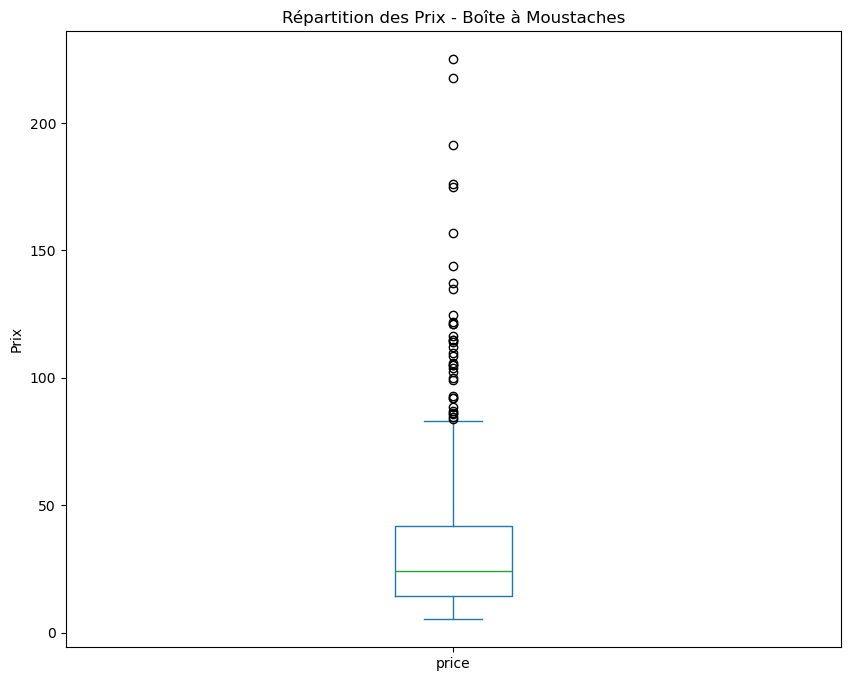

In [100]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Taille de la figure
df_final['price'].plot.box()

# Ajouter un titre et des labels
plt.title("Répartition des Prix - Boîte à Moustaches")
plt.ylabel("Prix")

# Afficher la boîte à moustaches
plt.show()

In [101]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


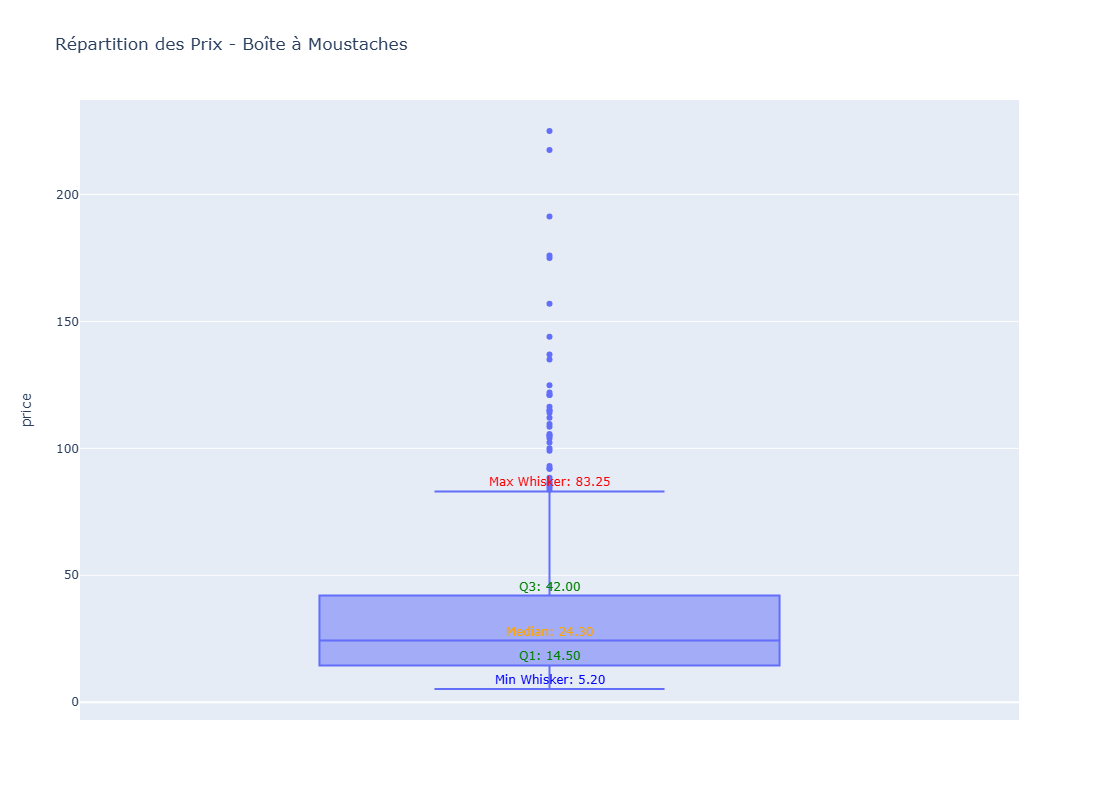

In [102]:
import plotly.express as px
import numpy as np

# Calcul de l'IQR
q1 = df_final['price'].quantile(0.25)
q3 = df_final['price'].quantile(0.75)
iqr = q3 - q1

# Calcul des limites des whiskers (borne max et min sans outliers)
lower_whisker = max(q1 - 1.5 * iqr, df_final['price'].min())  # whisker inférieur
upper_whisker = min(q3 + 1.5 * iqr, df_final['price'].max())  # whisker supérieur

# Créer la boîte à moustaches avec les valeurs extrêmes
fig = px.box(df_final, y='price', title="Répartition des Prix - Boîte à Moustaches")

# Calcul des valeurs statistiques à afficher
median = df_final['price'].median()

# Ajouter les annotations pour les valeurs statistiques (avec les whiskers)
fig.add_annotation(x=0, y=lower_whisker, text=f"Min Whisker: {lower_whisker:.2f}", showarrow=False, yshift=10, font=dict(size=12, color="blue"))
fig.add_annotation(x=0, y=q1, text=f"Q1: {q1:.2f}", showarrow=False, yshift=10, font=dict(size=12, color="green"))
fig.add_annotation(x=0, y=median, text=f"Median: {median:.2f}", showarrow=False, yshift=10, font=dict(size=12, color="orange"))
fig.add_annotation(x=0, y=q3, text=f"Q3: {q3:.2f}", showarrow=False, yshift=10, font=dict(size=12, color="green"))
fig.add_annotation(x=0, y=upper_whisker, text=f"Max Whisker: {upper_whisker:.2f}", showarrow=False, yshift=10, font=dict(size=12, color="red"))

# Fixer la taille de la figure
fig.update_layout(width=1000, height=800)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("boite_a_moustache_price_avec_annotations.png", format='png', width=1000, height=800, scale=3)

# Afficher la boîte à moustaches
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [105]:
#Calculer la moyenne du prix
moyenne_prix = df_final['price'].mean()
# Afficher la moyenne
print(f"La moyenne des prix est : {moyenne_prix}")

#Calculer l'écart-type du prix
ecart_type_prix = df_final['price'].std()

# Afficher l'écart-type
print(f"L'écart-type des prix est : {ecart_type_prix}")

#Calculer le Z-score
df_final['z_score'] = (df_final['price'] - moyenne_prix) / ecart_type_prix

# Afficher les premières lignes avec les Z-scores
print(df_final[['price', 'z_score']].head())

La moyenne des prix est : 32.27763636363637
L'écart-type des prix est : 26.603195978591984
   price   z_score
0   24.2 -0.303634
1   34.3  0.076020
2   20.8 -0.431438
3   14.1 -0.683288
4   46.0  0.515816


In [106]:
#Quel est le seuil prix dont z-score est supérieur à 3?
# Définir le Z-score
z_score_threshold = 3

# Calculer le seuil de prix
seuil_prix = moyenne_prix + z_score_threshold * ecart_type_prix

# Afficher le seuil
print(f"Le seuil de prix dont le Z-score est supérieur à 3 est : {seuil_prix}")

Le seuil de prix dont le Z-score est supérieur à 3 est : 112.08722429941233


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [108]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
statistiques = df_final['price'].describe()
# Afficher les statistiques descriptives
print(statistiques)

count    825.000000
mean      32.277636
std       26.603196
min        5.200000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [109]:
#Définissez un seuil pour les articles "outliers" en prix
# Calculer l'IQR
IQR = statistiques['75%'] - statistiques['25%']

# Afficher l'IQR
print(f"L'intervalle interquartile (IQR) est : {IQR}")

L'intervalle interquartile (IQR) est : 27.5


In [110]:
# Définir les limites pour identifier les outliers
limite_inf = statistiques['25%'] - 1.5 * IQR
limite_sup = statistiques['75%'] + 1.5 * IQR

# Afficher les limites
print(f"\nLimite inférieure : {limite_inf}, \nLimite supérieure : {limite_sup}")

# Identifier les outliers
outliers = df_final[(df_final['price'] < limite_inf) | (df_final['price'] > limite_sup)]
print("\nOutliers identifiés :")

print(outliers[['product_id_erp', 'post_title', 'product_type', 'price']])


Limite inférieure : -26.75, 
Limite supérieure : 83.25

Outliers identifiés :
    product_id_erp                                         post_title  \
19            4055                                                NaN   
66            4115  Zind-Humbrecht Riesling Grand Cru Rangen De Th...   
68            4132  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   
208           4352     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
214           4359  Champagne Larmandier-Bernier Grand Cru Les Che...   
227           4402                               Cognac Frapin VIP XO   
228           4404              Cognac Frapin Château de Fontpinot XO   
230           4406  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
231           4407                          Cognac Frapin Cigar Blend   
240           4582  Château de Meursault Puligny-Montrachet 1er Cr...   
242           4594                                                NaN   
410           4903  Domaine Des Croix Corton 

In [111]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# 1. Calculer le nombre total d'articles
nombre_total_articles = df_final.shape[0]

# 2. Calculer le nombre total d'outliers
nombre_outliers = outliers.shape[0]

# 3. Calculer la proportion d'outliers
proportion_outliers = nombre_outliers / nombre_total_articles

# Afficher les résultats
print(f"Nombre total d'articles : {nombre_total_articles}")
print(f"Nombre d'outliers : {nombre_outliers}")
print(f"Proportion d'outliers : {proportion_outliers:.2%}")

Nombre total d'articles : 825
Nombre d'outliers : 36
Proportion d'outliers : 4.36%


In [112]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Pour justifier ces outliers, il y a lieu d'effectuer d'autres analyses.</h3>
</div>


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Tout d'abord, je réalise un graphique de dispersion de la variable 'price' qui me permettra de déterminer l'approche appliquée</h3>
</div>


C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



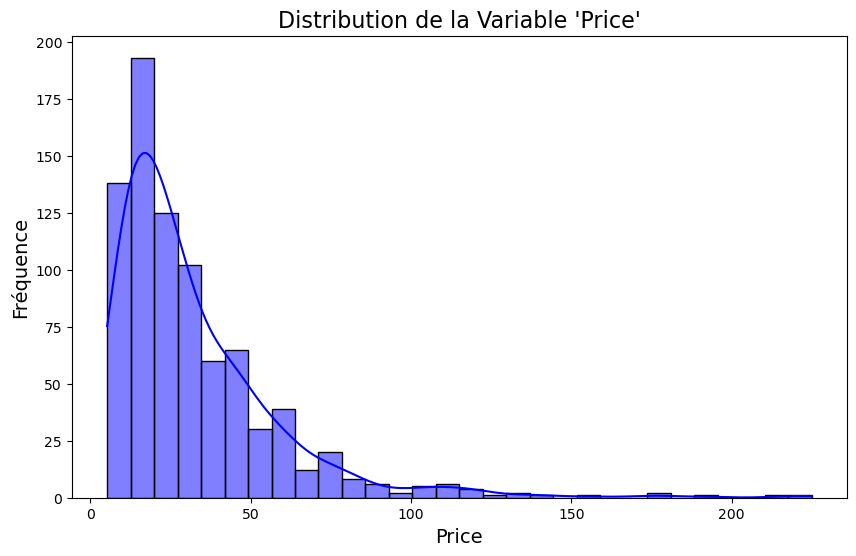

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuster la taille de la figure
plt.figure(figsize=(10, 6))

# Créer un histogramme avec la courbe KDE
sns.histplot(df_final['price'], kde=True, bins=30, color='blue')

# Ajouter un titre et les labels
plt.title("Distribution de la Variable 'Price'", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("distribution_prix.png", format='png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Manifestement, la distribution est asymétrique, je décide donc d'effectuer quelques tests supplémentaires en choisissant la méthode IQR pour ma sélection des outliers</h3>
</div>

In [117]:
# Filtrer les Outliers : Créez un DataFrame sans les outliers.
df_sans_outliers = df_final[(df_final['price'] >= limite_inf) & (df_final['price'] <= limite_sup)]


# Calculer la Moyenne : Calculez la moyenne de price sans les outliers.
mean_price_sans_outliers = df_sans_outliers['price'].mean()
print("Moyenne du prix sans outliers :", mean_price_sans_outliers)

# Étape 3 : Calculer la moyenne de 'price' avec les outliers
mean_price_avec_outliers = df_final['price'].mean()  # Ajoutez les parenthèses ici
print("Moyenne du prix avec outliers :", mean_price_avec_outliers)

Moyenne du prix sans outliers : 28.236692015209126
Moyenne du prix avec outliers : 32.27763636363637


In [118]:
# Moyenne du prix par product_type avec tous les enregistrements
mean_tous = df_final.groupby('product_type')['price'].mean().reset_index()

# Afficher le résultat
print("\nMoyenne de 'price' par 'product_type' avec tous les enregistrements :\n")
print(mean_tous)



Moyenne de 'price' par 'product_type' avec tous les enregistrements :

    product_type      price
0      Champagne  69.626786
1         Cognac  97.500000
2            Gin  36.000000
3  Huile d'olive  24.933333
4            Vin  29.281307
5         Whisky  65.557143


In [119]:
# Moyenne du prix par product_type sans les outliers
mean_sans_outliers = df_sans_outliers.groupby('product_type')['price'].mean().reset_index()

# Afficher le résultat
print("\nMoyenne de 'price' par 'product_type' sans les outliers :\n")
print(mean_sans_outliers)



Moyenne de 'price' par 'product_type' sans les outliers :

    product_type      price
0      Champagne  50.629545
1         Cognac  58.625000
2            Gin  36.000000
3  Huile d'olive  24.933333
4            Vin  26.656964
5         Whisky  53.527273


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Après ces diverses analyses complémentaires, il n'est pas possible de savoir si ces outliers doivent être conservés ou exclus de notre analyse sans avoir consulté des experts métier ou ceux ayant une connaissance approfondie des produits. Je décide donc de les conserver pour la suite de mon analyse.</h3>
</div>


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

In [122]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id_erp   825 non-null    object  
 1   onsale_web       825 non-null    bool    
 2   price            825 non-null    float64 
 3   stock_quantity   825 non-null    int64   
 4   stock_status     825 non-null    object  
 5   purchase_price   825 non-null    float64 
 6   product_id_web   734 non-null    object  
 7   _merge_existing  825 non-null    category
 8   total_sales      714 non-null    float64 
 9   tax_status       714 non-null    object  
 10  product_type     713 non-null    object  
 11  post_title       714 non-null    object  
 12  _merge           825 non-null    category
 13  z_score          825 non-null    float64 
dtypes: bool(1), category(2), float64(4), int64(1), object(6)
memory usage: 73.7+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [124]:
##############################
# Calculer le CA du site web #
##############################

#Créez une colonne calculant le CA par article
df_final['CA_article'] = df_final['price'] * df_final['total_sales']
#Calculez la somme de la colonne "ca_par_article"
somme_CA = df_final['CA_article'].sum()
#Ce résultat correspond au chiffre d'affaire du site web
print(f"La somme du chiffre d'affaires du site web est : {somme_CA}")

La somme du chiffre d'affaires du site web est : 143680.1


product_id_erp                                         post_title  \
0            4352     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
1            5892  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
2            4353          Champagne Egly-Ouriet Grand Cru Brut Rosé   
3            5826              Agnès Levet Côte Rôtie Améthyste 2017   
4            6212  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
5            5026  Champagne Agrapart &amp; Fils Minéral Extra Br...   
6            5008  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
7            5767                Camille Giroud Clos de Vougeot 2016   
8            6126             Champagne Gosset Célébris Vintage 2007   
9            5025  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
10           6201  David Duband Chambolle-Musigny 1er Cru Les Sen...   
11           4406  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
12           4647  Bernard Baudry Chinon Rouge La Croix Boissée 2017   
13           4358  Champagne Larmandier-Bernier Grand Cru Vieille...   
14           4359  Champagne Larmandier-Bernier Grand Cru Les Che...   
15           6214  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
16           6202  Domaine Clerget Echezeaux Grand Cru En Orveaux...   
17           4350    Champagne Egly-Ouriet Grand Cru Extra Brut V.P.   
18           4573  Château de Meursault Beaune-Grèves Les Trois J...   
19           4402                               Cognac Frapin VIP XO   

    CA_article  
0       2475.0  
1       1147.8  
2       1113.0  
3        824.0  
4        805.0  
5        781.2  
6        735.0  
7        700.0  
8        675.0  
9        672.0  
10       633.6  
11       628.0  
12       627.0  
13       616.0  
14       599.2  
15       594.0  
16       582.0  
17       556.5  
18       537.6  
19       528.0

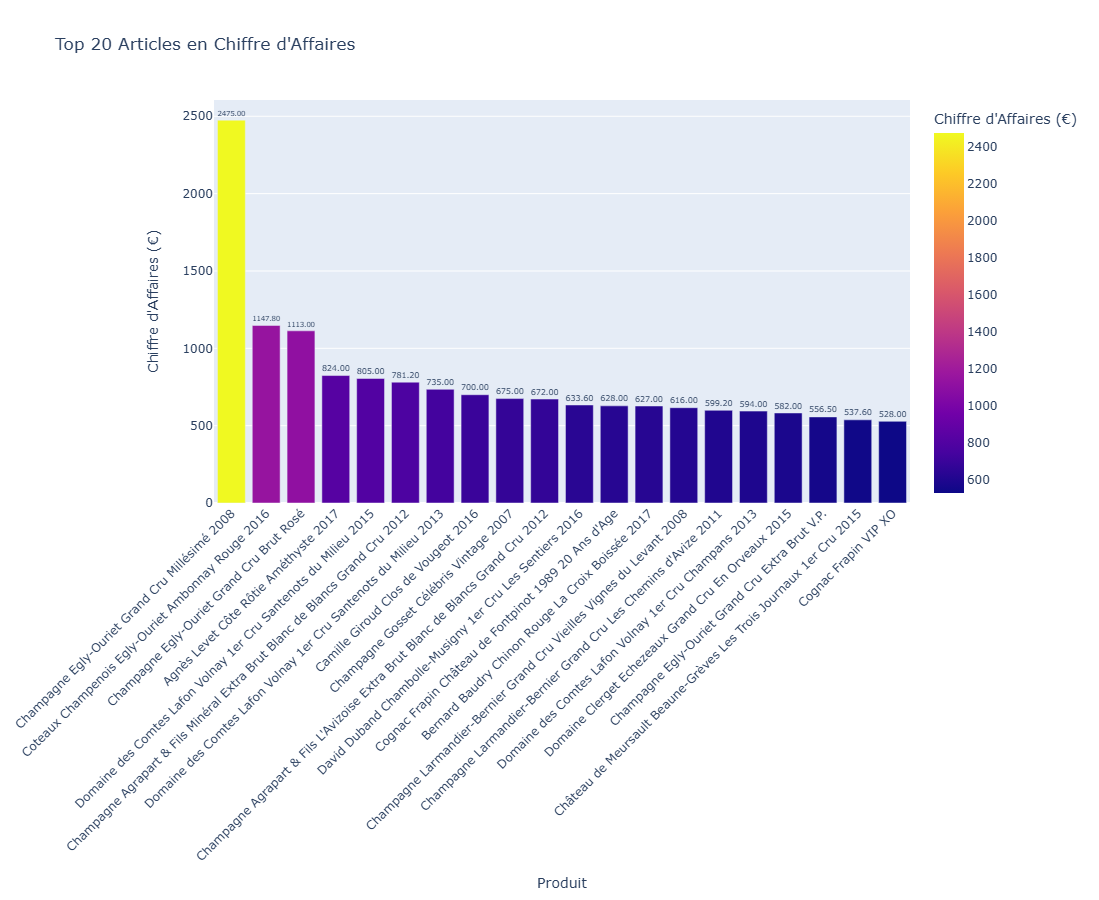

In [125]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_final
df_final_sorted = df_final.sort_values(by='CA_article', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_final_sorted_reset = df_final_sorted.reset_index(drop=True)

#Afficher les 20 premier articles en CA
top_20_articles = df_final_sorted_reset.head(20)

# Afficher les résultats sous forme de tableau
results_table = top_20_articles[['product_id_erp', 'post_title', 'CA_article']]

# Afficher le tableau
display(results_table)

#Graphique en barre des 20 premiers articles avec plotly express
import plotly.express as px

# Créer le graphique en barres pour les 20 premiers articles
fig = px.bar(
    top_20_articles, 
    x='post_title',       # Axe des x : Identifiant des produits
    y='CA_article',           # Axe des y : Chiffre d'affaires par article
    title='Top 20 Articles en Chiffre d\'Affaires',
    labels={'post_title': 'Produit', 'CA_article': 'Chiffre d\'Affaires (€)'},
    color='CA_article',       # Coloration des barres en fonction du CA
    text='CA_article'         # Afficher les valeurs du CA sur les barres
)

# Ajuster la présentation du texte sur les barres
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
    xaxis_title='Produit', 
    yaxis_title='Chiffre d\'Affaires (€)',
    xaxis_tickangle=-45  # Incliner les étiquettes des produits pour une meilleure lisibilité
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("Top_20_articles_CA.png", format='png', width=1000, height=900, scale=3)

# Afficher le graphique
fig.show()


In [126]:
# Calcul du chiffre d'affaires total par type de produit

# Calcul du chiffre d'affaires total par post_type
df_ca_par_post_type = df_final.groupby('product_type')['CA_article'].sum().reset_index()

# Trier les résultats dans l'ordre décroissant
df_ca_par_post_type_sorted = df_ca_par_post_type.sort_values(by='CA_article', ascending=False)

# Afficher le DataFrame trié
print(df_ca_par_post_type_sorted)

    product_type  CA_article
4            Vin    123518.0
0      Champagne     12928.6
1         Cognac      3170.2
5         Whisky      2886.6
2            Gin       504.0
3  Huile d'olive       497.7


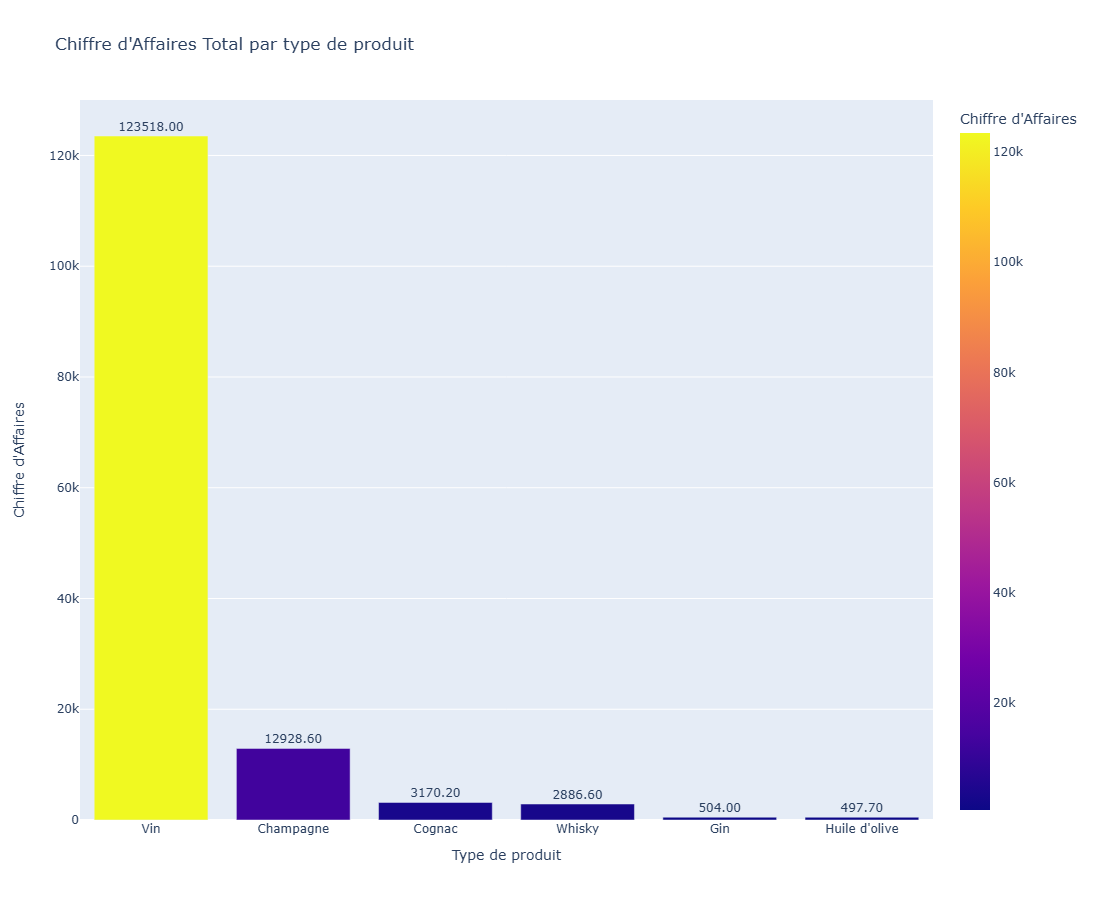

In [127]:
# Créer le graphique à barres
fig = px.bar(
    df_ca_par_post_type_sorted, 
    x='product_type', 
    y='CA_article', 
    title='Chiffre d\'Affaires Total par type de produit',
    labels={'product_type': 'Type de produit', 'CA_article': 'Chiffre d\'Affaires'},
    color='CA_article',  # Colorer les barres en fonction du CA
    text='CA_article'    # Afficher les valeurs de CA sur les barres
)

# Ajuster la présentation du texte sur les barres
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("CA_type_produit.png", format='png', width=1000, height=900, scale=3)

# Afficher le graphique
fig.show()

In [128]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_final_sorted['CA_part'] = df_final_sorted['CA_article'] / somme_CA

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_final_sorted['CA_cumulative'] = df_final_sorted['CA_part'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
articles_80_pourcent_CA = df_final_sorted[df_final_sorted['CA_cumulative'] <= 0.80]
# Calculer le nombre d'articles correspondant
nombre_articles_80_pourcent_CA = articles_80_pourcent_CA.shape[0]

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
# Nombre total d'articles dans le catalogue
nombre_total_articles = df_final_sorted.shape[0]
# Calculer la proportion d'articles représentant 80% du CA
proportion_80_pourcent_CA = nombre_articles_80_pourcent_CA / nombre_total_articles
# Afficher la proportion en pourcentage
print(f"Proportion d'articles représentant 80% du CA : {proportion_80_pourcent_CA * 100:.2f}%")

Proportion d'articles représentant 80% du CA : 52.61%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

   product_id_erp  total_sales  stock_quantity
0            4867         36.0             121
1            4203         27.0              74
2            4275         24.0              62
3            4726         22.0               0
4            4647         22.0              45
5            6129         20.0              68
6            5826         20.0              34
7            4220         18.0              48
8            5803         17.0              47
9            5778         17.0              44
10           6569         17.0              58
11           5777         16.0              51
12           4059         16.0              34
13           4863         16.0              54
14           4870         16.0               0
15           4188         16.0              51
16           5695         16.0              33
17           4105         16.0              45
18           4865         15.0              48
19           5016         15.0              40


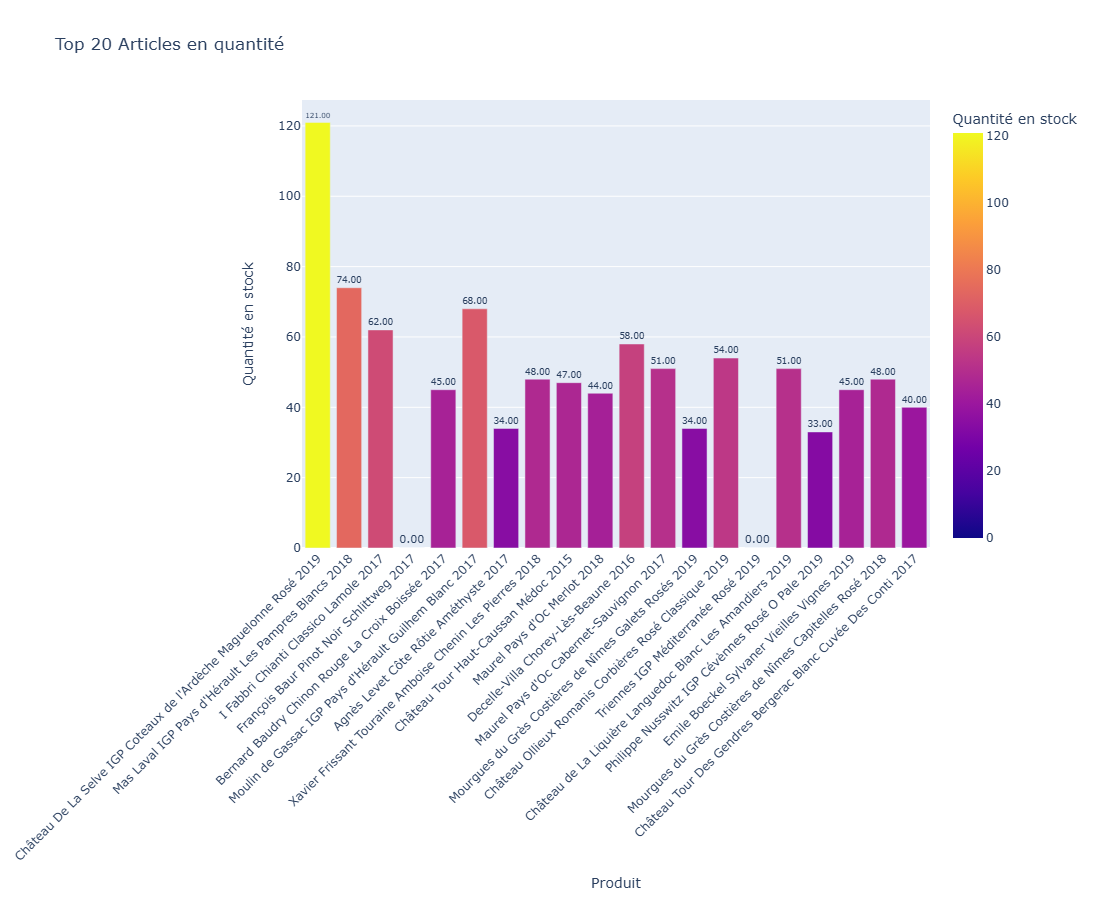

In [130]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_final
df_final_sorted_quantity = df_final.sort_values(by='total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_final_sorted_quantity_reset = df_final_sorted_quantity.reset_index(drop=True)
#Afficher les 20 premier articles en quantité
top_20_articles_quantity = df_final_sorted_quantity_reset.head(20)
# Afficher les résultats
print(top_20_articles_quantity[['product_id_erp', 'total_sales', 'stock_quantity']])

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(
    top_20_articles_quantity, 
    x='post_title',       # Axe des x : Identifiant des produits
    y='stock_quantity',           # Axe des y : Chiffre d'affaires par article
    title='Top 20 Articles en quantité',
    labels={'post_title': 'Produit', 'stock_quantity': 'Quantité en stock'},
    color='stock_quantity',       # Coloration des barres en fonction du CA
    text='stock_quantity'         # Afficher les valeurs du CA sur les barres
)

# Ajuster la présentation du texte sur les barres
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
    xaxis_title='Produit', 
    yaxis_title='Quantité en stock',
    xaxis_tickangle=-45  # Incliner les étiquettes des produits pour une meilleure lisibilité
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("top_20_quantite.png", format='png', width=1000, height=900, scale=3)

# Afficher le graphique
fig.show()

In [131]:
###################################
# Calculer le 20 / 80 en quantité #
###################################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_final_sorted_quantity['total_sales_part'] = df_final_sorted_quantity['total_sales'] / (df_final_sorted_quantity['total_sales'].sum())
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_final_sorted_quantity['total_sales_cumulative'] = df_final_sorted_quantity['total_sales_part'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
articles_80_pourcent_sales = df_final_sorted_quantity[df_final_sorted_quantity['total_sales_cumulative'] <= 0.80]
# Calculer le nombre d'articles correspondant
nombre_articles_80_pourcent_sales = articles_80_pourcent_sales.shape[0]
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
# Calculer la proportion d'articles représentant 80% des quantités vendues
proportion_80_pourcent_sales = nombre_articles_80_pourcent_sales / nombre_total_articles
# Afficher la proportion en pourcentage
print(f"Proportion d'articles représentant 80% des quantités vendues : {proportion_80_pourcent_sales * 100:.2f}%")

Proportion d'articles représentant 80% des quantités vendues : 52.48%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

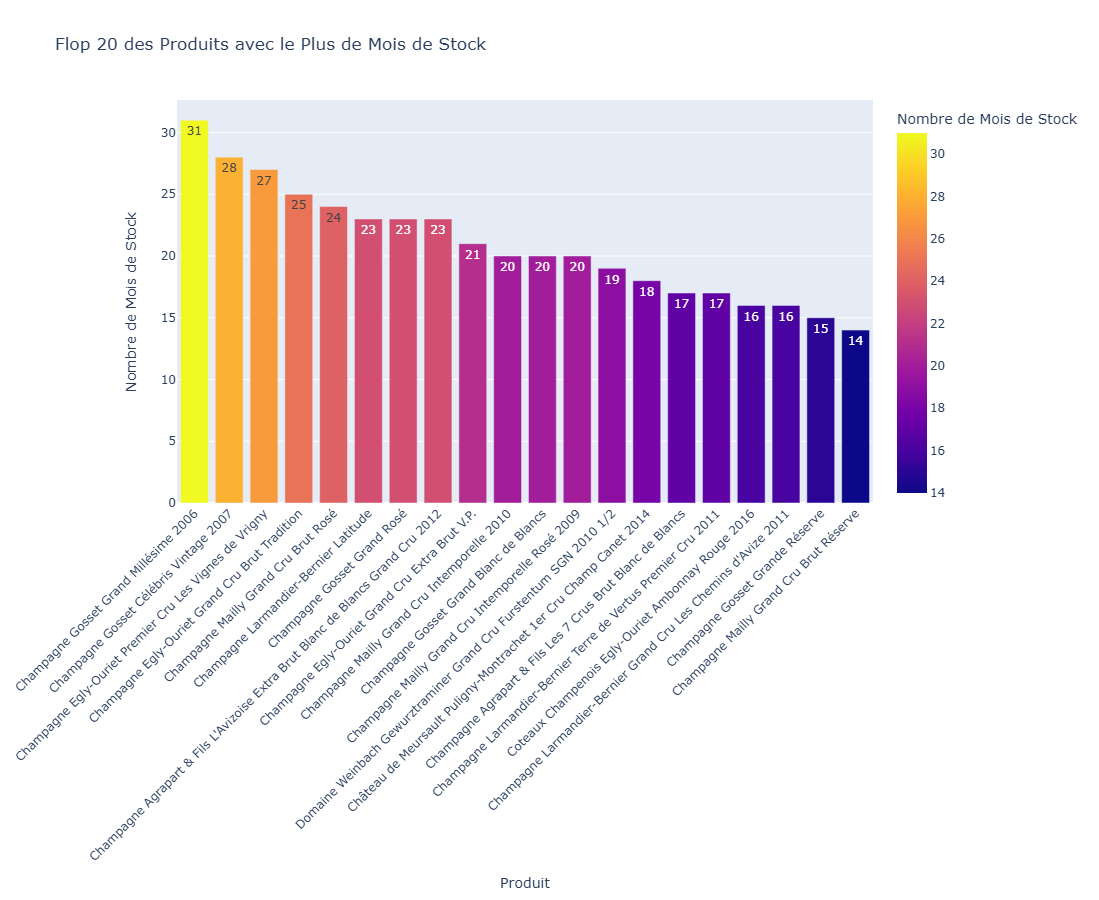

In [133]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_final['Rotation_stock'] = df_final['stock_quantity'] / df_final['total_sales']

#Remplacement des "inf" par 0
df_final['Rotation_stock'].replace([float('inf'), -float('inf')], 0, inplace=True)
df_final['Rotation_stock'].fillna(0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_final_sorted_stock = df_final.sort_values(by='Rotation_stock', ascending=False)

# Réinitialiser l'index après le tri
df_final_sorted_stock = df_final_sorted_stock.reset_index(drop=True)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
# Filtrer les 20 produits avec le plus de mois de stock
df_final_sorted_stock_arrondi = df_final_sorted_stock.round(0)
flop_20_stock = df_final_sorted_stock_arrondi.head(20)

fig = px.bar(
    flop_20_stock,
    x='post_title',  # Remplace par l'identifiant de produit
    y='Rotation_stock',      # Colonne représentant le nombre de mois de stock
    title='Flop 20 des Produits avec le Plus de Mois de Stock',
    labels={'post_title': 'Produit', 'Rotation_stock': 'Nombre de Mois de Stock'},
    color='Rotation_stock',  # Optionnel : colorier les barres en fonction du nombre de mois de stock
    text='Rotation_stock'    # Afficher les valeurs sur les barres
)
# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
    xaxis_title='Produit', 
    yaxis_title='Nombre de Mois de Stock',
    xaxis_tickangle=-45  # Incliner les étiquettes des produits pour une meilleure lisibilité
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("flop_20_stock.png", format='png', width=1000, height=900, scale=3)

# Afficher le graphique
fig.show()

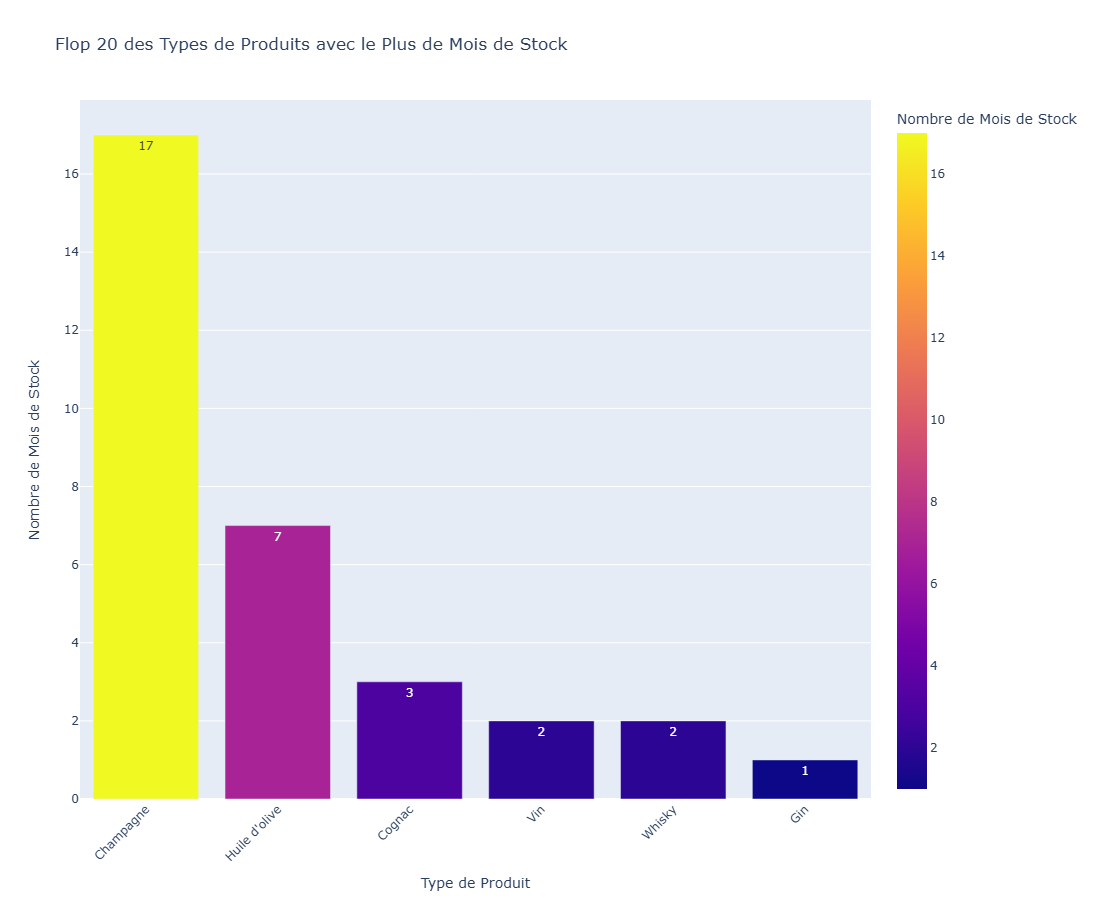

In [134]:
# Import de numpy
import numpy as np

# Regrouper par type de produit et calculer la rotation de stock
df_rotation_by_product_type = df_final.groupby('product_type').agg({
    'stock_quantity': 'sum',
    'total_sales': 'sum'
}).reset_index()

# Création de la colonne Rotation de stock par type de produit
df_rotation_by_product_type['Rotation_stock'] = df_rotation_by_product_type['stock_quantity'] / df_rotation_by_product_type['total_sales']

# Remplacement des "inf" par 0 et des NaN par 0
df_rotation_by_product_type['Rotation_stock'].replace([float('inf'), -float('inf')], 0, inplace=True)
df_rotation_by_product_type['Rotation_stock'].fillna(0, inplace=True)

# Trier dans l'ordre décroissant par Rotation_stock
df_rotation_sorted_stock = df_rotation_by_product_type.sort_values(by='Rotation_stock', ascending=False).reset_index(drop=True)

# Arrondir les valeurs à 0 décimale pour la lisibilité
df_rotation_sorted_stock = df_rotation_sorted_stock.round(0)

# Sélectionner les 20 types de produits avec le plus de rotation de stock
flop_20_stock = df_rotation_sorted_stock.head(20)

# Graphique en barre du flop 20 des types de produits avec le plus de mois de stock
import plotly.express as px

fig = px.bar(
    flop_20_stock,
    x='product_type',  # Type de produit
    y='Rotation_stock',  # Colonne représentant le nombre de mois de stock
    title='Flop 20 des Types de Produits avec le Plus de Mois de Stock',
    labels={'product_type': 'Type de Produit', 'Rotation_stock': 'Nombre de Mois de Stock'},
    color='Rotation_stock',  # Colorier les barres en fonction du nombre de mois de stock
    text='Rotation_stock'    # Afficher les valeurs sur les barres
)

# Agrandir le graphique et ajuster les étiquettes
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,      # Largeur du graphique
    xaxis_title='Type de Produit', 
    yaxis_title='Nombre de Mois de Stock',
    xaxis_tickangle=-45  # Incliner les étiquettes pour une meilleure lisibilité
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("flop_20_type_produit_stock.png", format='png', width=1000, height=900, scale=3)

# Afficher le graphique
fig.show()


In [135]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final['Valorisation_stock'] = df_final['stock_quantity'] * df_final['purchase_price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
somme_valorisation_stock = df_final['Valorisation_stock'].sum()

# Afficher le résultat
print(f"La somme totale de la valorisation des stocks aux prix d'achat en euros est : {somme_valorisation_stock} €")

La somme totale de la valorisation des stocks aux prix d'achat en euros est : 298555.76 €


In [136]:
#Création de la colonne Valorisation des stocks en euros
df_final['Valorisation_stock'] = df_final['stock_quantity'] * df_final['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
somme_valorisation_stock_pv = df_final['Valorisation_stock'].sum()

# Afficher le résultat
print(f"La somme totale de la valorisation des stocks aux prix de vente en euros est : {somme_valorisation_stock_pv} €")

La somme totale de la valorisation des stocks aux prix de vente en euros est : 531974.6 €


In [137]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
somme_stock_quantity = df_final['stock_quantity'].sum()

# Afficher le résultat
print(f"La somme totale des quantités en stock est : {somme_stock_quantity}")

La somme totale des quantités en stock est : 17811


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [139]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
# Définir le taux de TVA (ici, 20% en France)
taux_tva = 0.20

# Créer la colonne 'prix_HT' en divisant le prix TTC par (1 + taux de TVA)
df_final['prix_HT'] = df_final['price'] / (1 + taux_tva)

# Arrondir à 2 décimales
df_final['prix_HT'] = df_final['prix_HT'].round(2)

# Afficher les premières lignes pour vérifier
print(df_final[['product_id_web', 'price', 'prix_HT']].head())

#Création de la colonne Taux de marge
df_final['taux_de_marge'] = ((df_final['prix_HT'] - df_final['purchase_price']) / df_final['purchase_price']) * 100

# Arrondir à 2 décimales
df_final['taux_de_marge'] = df_final['taux_de_marge'].round(2)

# Afficher les premières lignes pour vérifier le calcul
print(df_final[['prix_HT', 'purchase_price', 'taux_de_marge']].head())

#Afficher le prix minimum de la colonne "taux_marge"
prix_minimum_taux_marge = df_final['taux_de_marge'].min()
print("Le prix minimum dans la colonne 'taux_de_marge' est :", prix_minimum_taux_marge)

#Afficher le prix maximum de la colonne "taux_marge"
prix_maximum_taux_marge = df_final['taux_de_marge'].max()
print("Le prix maximum dans la colonne 'taux_de_marge' est :", prix_maximum_taux_marge)

  product_id_web  price  prix_HT
0          15298   24.2    20.17
1          15296   34.3    28.58
2          15300   20.8    17.33
3          19814   14.1    11.75
4          19815   46.0    38.33
   prix_HT  purchase_price  taux_de_marge
0    20.17           12.88          56.60
1    28.58           17.54          62.94
2    17.33           10.64          62.88
3    11.75            6.92          69.80
4    38.33           23.77          61.25
Le prix minimum dans la colonne 'taux_de_marge' est : -86.4
Le prix maximum dans la colonne 'taux_de_marge' est : 91.41


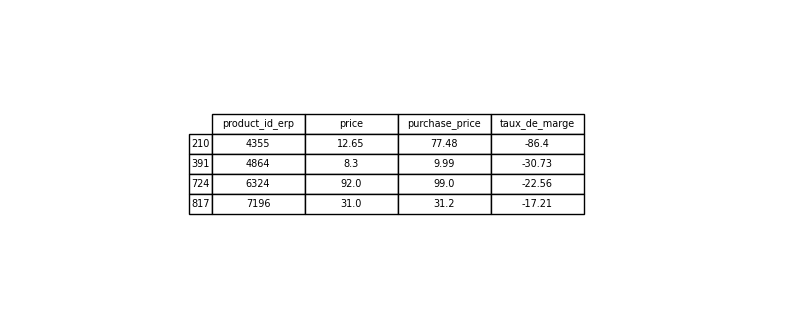

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supposons que df_final est déjà défini avec tes données
# Filtrer les lignes où le taux de marge est inférieur à 0
lignes_taux_de_marge_negatif = df_final[df_final['taux_de_marge'] < 0]

# Sélectionner les colonnes d'intérêt
results_lignes_taux_de_marge_negatif = lignes_taux_de_marge_negatif[['product_id_erp', 'price', 'purchase_price', 'taux_de_marge']]

# Créer une figure pour l'exportation
fig, ax = plt.subplots(figsize=(10, 4))  # ajuster la taille selon tes besoins
ax.axis('off')  # Ne pas afficher les axes

# Afficher le tableau sur la figure
tbl = table(ax, results_lignes_taux_de_marge_negatif, loc='center', cellLoc='center', colWidths=[0.1]*len(results_lignes_taux_de_marge_negatif.columns))

# Personnaliser l'apparence du tableau
tbl.auto_set_font_size(True)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)  # Échelle du tableau (ajuste si nécessaire)

# Exporter la figure en PNG
plt.savefig("lignes_taux_de_marge_negatif.png", format='png', dpi=300, bbox_inches='tight')

# Afficher la figure avec le tableau
plt.show()


<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10);font-size:12px;">Il s'agit des produits dont le prix de vente HT est inférieur au prix d'achat. Il y aura lieu de les corriger. Il n'y a pas eu de vente.</h3>
</div>

In [142]:
#création d'un dataframe avec les taux positifs
df_taux_de_marge_positif = df_final[df_final['taux_de_marge'] > 0]
# Afficher les premières lignes pour vérifier
print(df_taux_de_marge_positif.head())

#Afficher le prix minimum de la colonne "taux_marge"
prix_minimum_taux_marge = df_taux_de_marge_positif['taux_de_marge'].min()
print("Le prix minimum dans la colonne 'taux_de_marge' est :", prix_minimum_taux_marge)

#Afficher le prix maximum de la colonne "taux_marge"
prix_maximum_taux_marge = df_taux_de_marge_positif['taux_de_marge'].max()
print("Le prix maximum dans la colonne 'taux_de_marge' est :", prix_maximum_taux_marge)

  product_id_erp  onsale_web  price  stock_quantity stock_status  \
0           3847        True   24.2              16      instock   
1           3849        True   34.3              10      instock   
2           3850        True   20.8               0   outofstock   
3           4032        True   14.1              26      instock   
4           4039        True   46.0               3      instock   

   purchase_price product_id_web _merge_existing  total_sales tax_status  \
0           12.88          15298            both          6.0    taxable   
1           17.54          15296            both          9.0    taxable   
2           10.64          15300            both          0.0    taxable   
3            6.92          19814            both         12.0    taxable   
4           23.77          19815            both          3.0    taxable   

  product_type                                         post_title _merge  \
0          Vin        Pierre Jean Villa Saint-Joseph Préfa

    product_type  taux_marge_moyen
1         Cognac             82.32
5         Whisky             81.74
2            Gin             74.83
4            Vin             61.50
0      Champagne             39.95
3  Huile d'olive             33.41


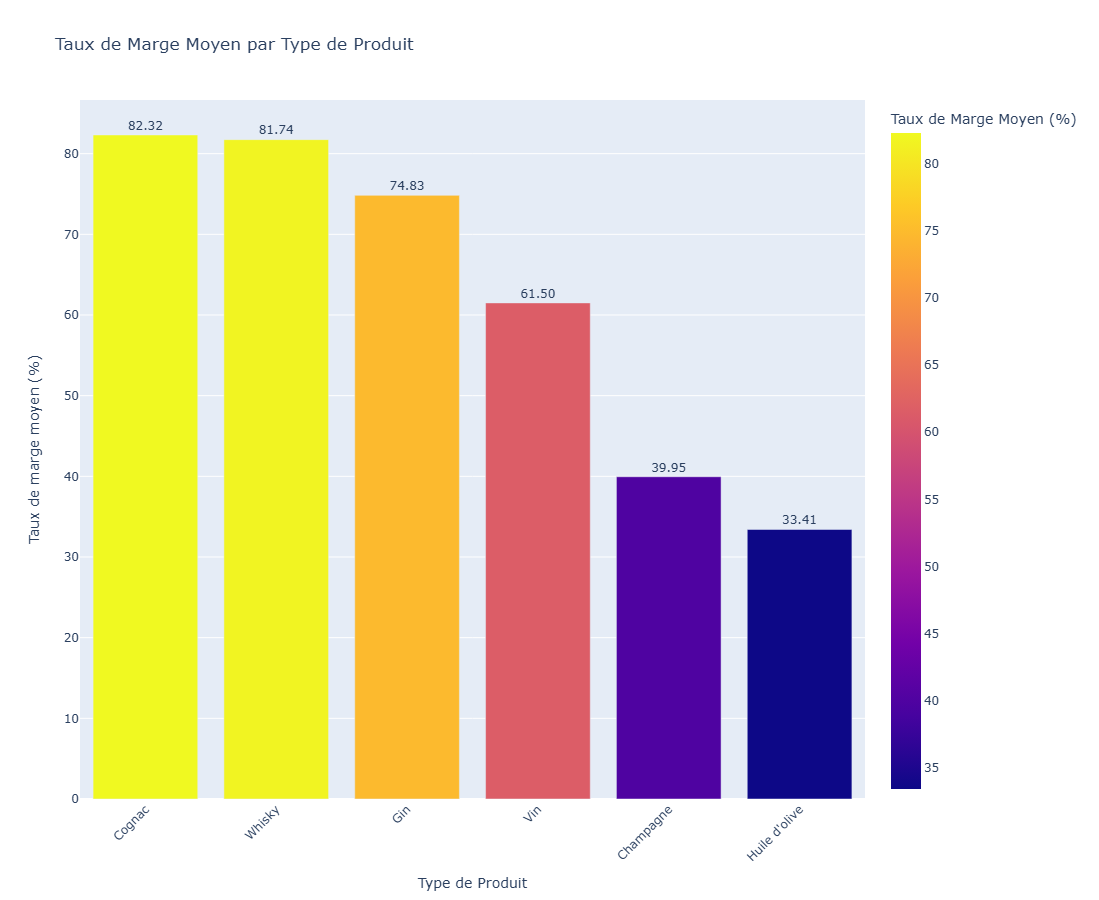

In [143]:
#création d'un dataframe avec le taux de marge moyen par type de produit
# Calcul du taux de marge moyen par type de produit
df_marge_moyenne_par_type = df_taux_de_marge_positif.groupby('product_type')['taux_de_marge'].mean().reset_index()

# Renommer les colonnes pour plus de clarté
df_marge_moyenne_par_type.columns = ['product_type', 'taux_marge_moyen']

# Arrondir à 2 décimales
df_marge_moyenne_par_type['taux_marge_moyen'] = df_marge_moyenne_par_type['taux_marge_moyen'].round(2)

# Classer par ordre décroissant du taux de marge moyen
df_marge_moyenne_par_type_sorted = df_marge_moyenne_par_type.sort_values(by='taux_marge_moyen', ascending=False)

# Afficher le DataFrame trié
print(df_marge_moyenne_par_type_sorted)

#Affichage dans un graphique du taux de marge par type de produit
# Créer le graphique en barres
fig = px.bar(
    df_marge_moyenne_par_type_sorted, 
    x='product_type', 
    y='taux_marge_moyen', 
    title='Taux de Marge Moyen par Type de Produit',
    labels={'product_type': 'Type de Produit', 'taux_marge_moyen': 'Taux de Marge Moyen (%)'},
    color='taux_marge_moyen',  # Colorier les barres en fonction du taux de marge
    text='taux_marge_moyen'    # Afficher les valeurs sur les barres
)

# Ajuster la présentation du texte sur les barres
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
    xaxis_title='Type de Produit', 
    yaxis_title='Taux de marge moyen (%)',
    xaxis_tickangle=-45  # Incliner les étiquettes des produits pour une meilleure lisibilité
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("taux_de_marge_moyen_type_produit.png", format='png', width=1000, height=900, scale=3)


# Afficher le graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [145]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


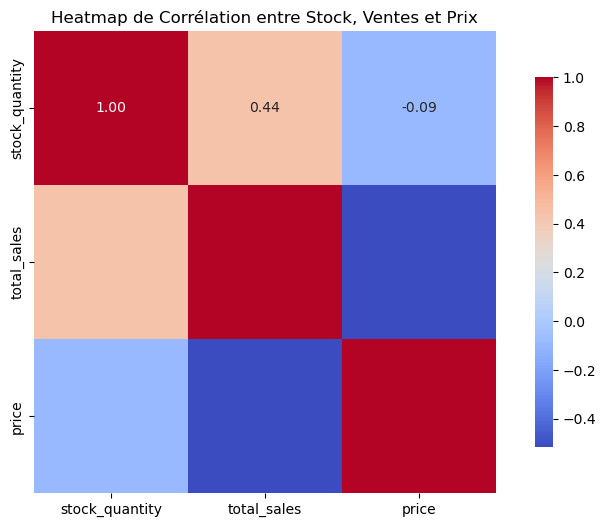

C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



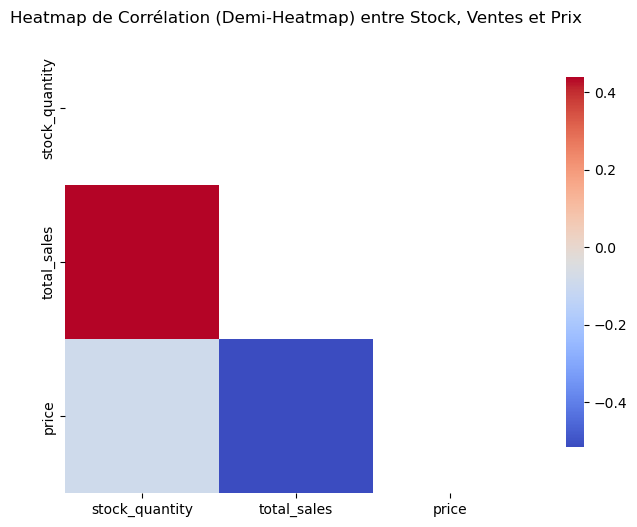

In [146]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

#Création d'un heatmap de correlation avec les variables stock, sales et price
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes d'intérêt
df_correlation = df_final[['stock_quantity', 'total_sales', 'price']]

# Calcul de la matrice de corrélation
correlation_matrix = df_correlation.corr()

# Création de la heatmap
plt.figure(figsize=(10, 6))  # Ajuste la taille de la figure si nécessaire
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Corrélation entre Stock, Ventes et Prix')

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("mon_graphique_heatmap_stock_total_sales_price.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

#on peut également créer un mask pour n'afficher qu'une demi heatmap
# Sélection des colonnes d'intérêt
df_correlation_1 = df_final[['stock_quantity', 'total_sales', 'price']]

# Calcul de la matrice de corrélation
correlation_matrix_1 = df_correlation_1.corr()

# Création du mask pour n'afficher que la moitié inférieure
mask = np.triu(np.ones_like(correlation_matrix_1, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap de Corrélation (Demi-Heatmap) entre Stock, Ventes et Prix')

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("mon_graphique_demi_heatmat_stock_total_sales_price.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 8px; color: RGB(247,10,10);font-size:12px;">

+ Corrélation entre 'stock_quantity' et 'total_sales' :

  
    Corrélation modérément positive en la quantité en stock et les ventes totales, ce qui signifie que plus il y a de stock disponible, plus les ventes ont tendance à augmenter. Cette corrélation n'est toutefois par très forte; il y a probablement d'autres facteurs influençant les ventes.

+ Corrélation en 'stock_quantity' et 'price' :

  
    Corrélation très légèrement négative. Cette corrélation est faible et n'est pas significative.

+ Corrélation entre 'total_sales' et 'price' :

  
    Une corrélation modérément négative existre entre les ventes et le prix. Cela signifie qu'une augmentation du prix a tendance a être associée à une diminution des ventes totales, ce qui est cohérent. Cependant, la valeur de la corrélation n'est pas suffisamment forte pour appuyer cette affirmation.</h3>
</div>

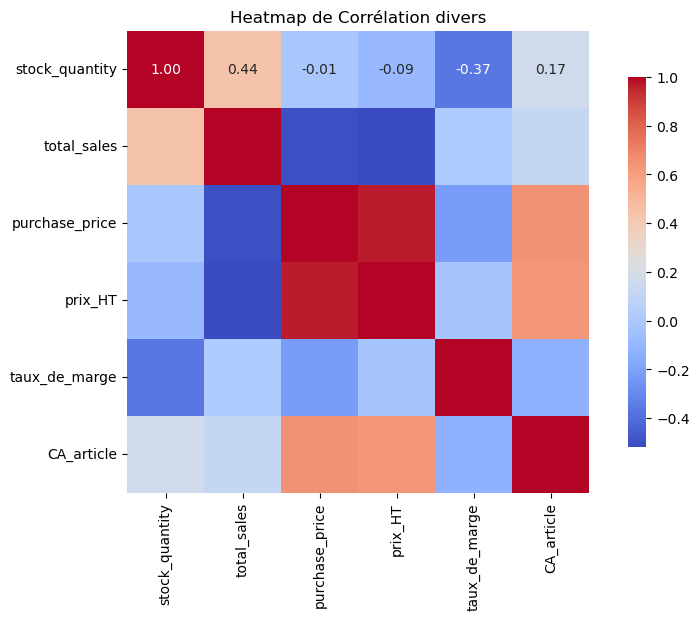

In [148]:
# Sélection des colonnes d'intérêt
df_correlation_divers = df_final[['stock_quantity', 'total_sales', 'purchase_price', 'prix_HT', 'taux_de_marge', 'CA_article']]

# Calcul de la matrice de corrélation
correlation_matrix_divers = df_correlation_divers.corr()

# Création de la heatmap
plt.figure(figsize=(10, 6))  # Ajuste la taille de la figure si nécessaire
sns.heatmap(correlation_matrix_divers, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Corrélation divers')

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("mon_graphique_heatmap_divers.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



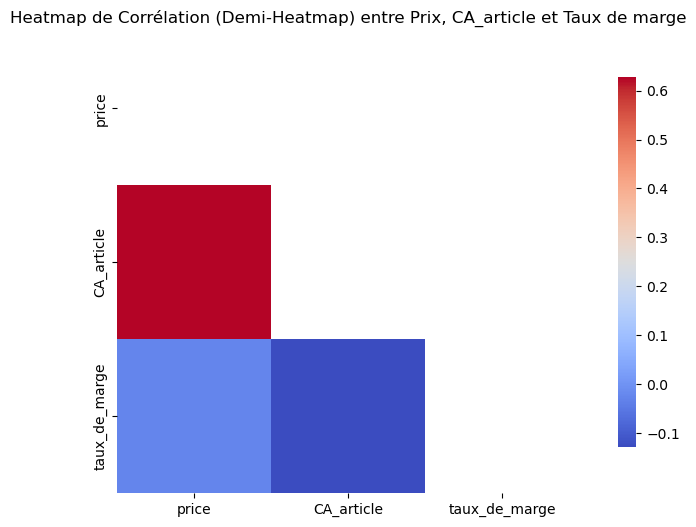

In [149]:
# Sélection des colonnes d'intérêt
df_correlation_3 = df_final[['price', 'CA_article', 'taux_de_marge']]

# Calcul de la matrice de corrélation
correlation_matrix_3 = df_correlation_3.corr()

# Création du mask pour n'afficher que la moitié inférieure
mask = np.triu(np.ones_like(correlation_matrix_3, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap de Corrélation (Demi-Heatmap) entre Prix, CA_article et Taux de marge')

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("mon_graphique_demi_heatmat_price_CA_article_taux_de_marge.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



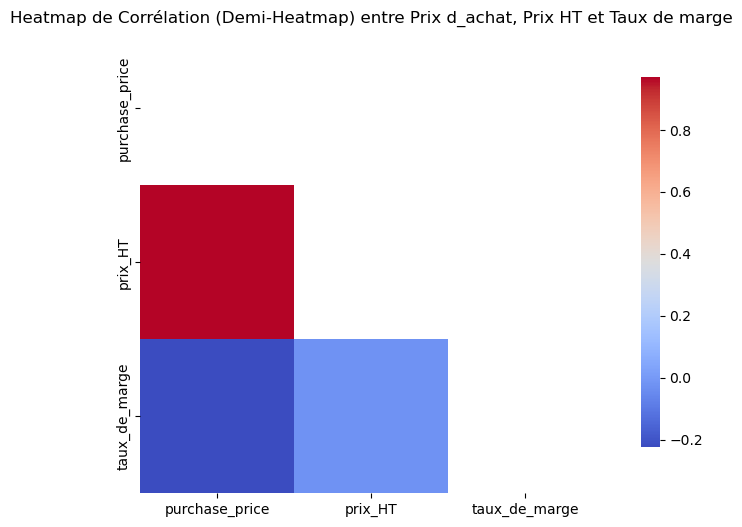

In [150]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
# Sélection des colonnes d'intérêt
df_correlation_5 = df_final[['purchase_price', 'prix_HT', 'taux_de_marge']]

# Calcul de la matrice de corrélation
correlation_matrix_5 = df_correlation_5.corr()

# Création du mask pour n'afficher que la moitié inférieure
mask = np.triu(np.ones_like(correlation_matrix_5, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap de Corrélation (Demi-Heatmap) entre Prix d_achat, Prix HT et Taux de marge')

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("mon_graphique_demi_heatmat_purchase_price_prix_HT_taux_de_marge.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



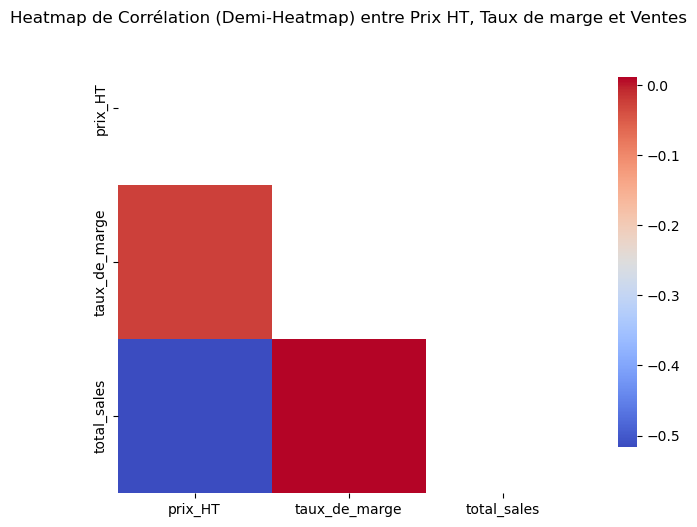

In [151]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
# Sélection des colonnes d'intérêt
df_correlation_7 = df_final[['prix_HT', 'taux_de_marge', 'total_sales']]

# Calcul de la matrice de corrélation
correlation_matrix_7 = df_correlation_7.corr()

# Création du mask pour n'afficher que la moitié inférieure
mask = np.triu(np.ones_like(correlation_matrix_7, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_7, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap de Corrélation (Demi-Heatmap) entre Prix HT, Taux de marge et Ventes')

# Exporter le graphique au format PNG avec matplotlib
plt.savefig("mon_graphique_demi_heatmat_prix_HT_taux_de_marge_ventes.png", format='png', dpi=300, bbox_inches='tight')

plt.show()

In [152]:
#Que peut-on conclure des correlations ?

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10); font-size:12px;">
CORRELATIONS OBSERVEES

1. Stock Quantity (Quantité en stock) :

    + Corrélation modérée positive avec Total Sales (Ventes Totales) :
  

        Une quantité de stock plus élevée est corrélée à une augmentation des ventes, ce qui est intuitivement logique : plus de stock permet plus de ventes.

    + Corrélations faibles ou presque nulles avec les autres variables :
  

        Le prix d'achat, le prix HT, le taux de marge et le chiffre d'affaires par article (CA_article) montrent des corrélations très faibles (proches de zéro ou négatives). Cela suggère que la quantité de stock disponible n'est pas directement liée à ces facteurs.


2. Total Sales (Ventes Totales) :

    + Corrélation positive avec Stock Quantity :


        Comme mentionné ci-dessus, cette relation est modérée et intuitive.

    + Corrélations faibles ou négatives avec les autres variables :


        Une corrélation légèrement négative avec le prix d'achat et le taux de marge indique que, même si les ventes augmentent, cela n'est pas directement lié à une augmentation du prix d'achat ou du taux de marge.


3. Purchase Price (Prix d'achat) :

    + Corrélation très forte avec le Prix HT :


        Cela montre que les prix d'achat et les prix HT sont très liés, ce qui est attendu car le prix HT est souvent déterminé en fonction du prix d'achat.

    + Corrélation négative modérée avec le taux de marge :


        Cela signifie qu'une augmentation du prix d'achat tend à réduire le taux de marge. En effet, si le coût des marchandises augmente et que les prix de vente ne suivent pas, la marge se réduit. La marge bénéficiaire est plus faible pour les produits ayant des coûts d'achat élevés.


4. Prix HT :

    + Forte corrélation avec Purchase Price :


        Comme déjà mentionné, cette relation est très forte, ce qui indique une interdépendance logique entre ces deux variables.

    + Corrélation négative modérée avec le taux de marge :


        Une augmentation du prix HT semble être associée à une réduction du taux de marge.

5. Taux de marge :

    + Corrélation négative modérée avec Purchase Price et Prix HT :


        Cela est logique dans un modèle économique où les coûts d'achat augmentent, sans que les prix de vente compensent, ce qui réduit la marge bénéficiaire.

6. CA Article (Chiffre d'affaires par article) :

    + Corrélation modérée avec Purchase Price et Prix HT :


        Le CA par article est plus élevé lorsque les prix d'achat ou les prix HT sont élevés, ce qui peut refléter des articles plus chers ou une gamme de produits plus premium.

CONCLUSION GENERALE

+ Relation Prix et Marge :

    Il y a une forte corrélation entre le prix d'achat et le prix HT, mais ils ont tous deux une corrélation négative avec le taux de marge, ce qui signifie qu'une augmentation des prix a un effet modérateur sur les marges.
  
+ Quantité de Stock et Ventes :

    La quantité de stock a une corrélation positive modérée avec les ventes totales, ce qui indique que plus de stock disponible peut entraîner une augmentation des ventes.


</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [155]:
#Mettre le dataset df_final sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  


In [156]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id_erp      825 non-null    object  
 1   onsale_web          825 non-null    bool    
 2   price               825 non-null    float64 
 3   stock_quantity      825 non-null    int64   
 4   stock_status        825 non-null    object  
 5   purchase_price      825 non-null    float64 
 6   product_id_web      734 non-null    object  
 7   _merge_existing     825 non-null    category
 8   total_sales         714 non-null    float64 
 9   tax_status          714 non-null    object  
 10  product_type        713 non-null    object  
 11  post_title          714 non-null    object  
 12  _merge              825 non-null    category
 13  z_score             825 non-null    float64 
 14  CA_article          714 non-null    float64 
 15  Rotation_stock      825 non-null    floa

In [157]:
# Supprimer les colonnes _merge_existing et _merge
df_final = df_final.drop(columns=['_merge_existing', '_merge'])

# Afficher le DataFrame pour vérifier que les colonnes ont été supprimées
print(df_final.head())

  product_id_erp  onsale_web  price  stock_quantity stock_status  \
0           3847        True   24.2              16      instock   
1           3849        True   34.3              10      instock   
2           3850        True   20.8               0   outofstock   
3           4032        True   14.1              26      instock   
4           4039        True   46.0               3      instock   

   purchase_price product_id_web  total_sales tax_status product_type  \
0           12.88          15298          6.0    taxable          Vin   
1           17.54          15296          9.0    taxable          Vin   
2           10.64          15300          0.0    taxable          Vin   
3            6.92          19814         12.0    taxable          Vin   
4           23.77          19815          3.0    taxable          Vin   

                                          post_title   z_score  CA_article  \
0        Pierre Jean Villa Saint-Joseph Préface 2018 -0.303634       145.2

In [158]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id_erp      825 non-null    object 
 1   onsale_web          825 non-null    bool   
 2   price               825 non-null    float64
 3   stock_quantity      825 non-null    int64  
 4   stock_status        825 non-null    object 
 5   purchase_price      825 non-null    float64
 6   product_id_web      734 non-null    object 
 7   total_sales         714 non-null    float64
 8   tax_status          714 non-null    object 
 9   product_type        713 non-null    object 
 10  post_title          714 non-null    object 
 11  z_score             825 non-null    float64
 12  CA_article          714 non-null    float64
 13  Rotation_stock      825 non-null    float64
 14  Valorisation_stock  825 non-null    float64
 15  prix_HT             825 non-null    float64
 16  taux_de_

In [159]:
# Exporter df_final au format CSV
df_final.to_csv('df_final.csv', index=False)

# Afficher un message de confirmation
print("Le DataFrame a été exporté au format CSV avec succès.")

Le DataFrame a été exporté au format CSV avec succès.


In [160]:
# Exporter les anomalies décelées

# Ajout de la colonne 'provenance' pour chaque DataFrame
anomalies_from_erp = differences.copy()
anomalies_from_erp['provenance_anomalies'] = 'erp_stock_status'

anomalies_from_erp_1 = df_erp[df_erp['stock_quantity'] < 0].copy()
anomalies_from_erp_1['provenance_anomalies'] = 'erp_stock_quantity'

anomalies_from_erp_2 = price_error.copy()
anomalies_from_erp_2['provenance_anomalies'] = 'erp_price'

anomalies_from_web = lignes_sans_code_article.copy()
anomalies_from_web['provenance_anomalies'] = 'web_lignes_sans_code_article_sans_ventes'

anomalies_from_web_1 = df_web_sans_code_article_non_null_sales
anomalies_from_web['provenance_anomalies'] = 'web_lignes_sans_code_article_avec_ventes'

anomalies_from_web_2 = lignes_non_conformes_sans_nan.copy()
anomalies_from_web['provenance_anomalies'] = 'web_identifiant_non_conforme'

anomalies_from_liaison = articles_incoherents.copy()
anomalies_from_liaison['provenance_anomalies'] = 'liaison_articles incohérents'

anomalies_from_final = df_final[df_final['taux_de_marge'] < 0].copy()
anomalies_from_final['provenance_anomalies'] = 'df_final_taux de marge négatif'

# Concaténer tous les DataFrames avec la colonne 'provenance'
anomalies_hors_doublons = pd.concat([
    anomalies_from_erp,
    anomalies_from_erp_1,
    anomalies_from_erp_2,
    anomalies_from_web,
    anomalies_from_web_1,
    anomalies_from_web_2,
    anomalies_from_liaison,
    anomalies_from_final
], ignore_index=True)

# Afficher le DataFrame anomalies pour vérifier l'ajout
anomalies_hors_doublons


product_id_erp onsale_web  price  stock_quantity stock_status  \
0             4039          1  46.00             3.0   outofstock   
1             4885          1  18.70             0.0      instock   
2             4973      False  10.00           -10.0   outofstock   
3             5700       True  44.50            -1.0   outofstock   
4             4233          0 -20.00             0.0   outofstock   
..             ...        ...    ...             ...          ...   
188           7204        NaN    NaN             NaN          NaN   
189           4355       True  12.65            97.0      instock   
190           4864      False   8.30             0.0   outofstock   
191           6324      False  92.00            18.0      instock   
192           7196      False  31.00            55.0      instock   

     purchase_price stock_status_2            provenance_anomalies  \
0             23.77        instock                erp_stock_status   
1              9.66     outofstock                erp_stock_status   
2              4.96            NaN              erp_stock_quantity   
3             22.30            NaN              erp_stock_quantity   
4             10.33     outofstock                       erp_price   
..              ...            ...                             ...   
188             NaN            NaN    liaison_articles incohérents   
189           77.48            NaN  df_final_taux de marge négatif   
190            9.99            NaN  df_final_taux de marge négatif   
191           99.00            NaN  df_final_taux de marge négatif   
192           31.20            NaN  df_final_taux de marge négatif   

    product_id_web  total_sales tax_status product_type  \
0              NaN          NaN        NaN          NaN   
1              NaN          NaN        NaN          NaN   
2              NaN          NaN        NaN          NaN   
3              NaN          NaN        NaN          NaN   
4              NaN          NaN        NaN          NaN   
..             ...          ...        ...          ...   
188            NaN          NaN        NaN          NaN   
189          12589          0.0    taxable    Champagne   
190          15154          NaN        NaN          NaN   
191            NaN          NaN        NaN          NaN   
192            NaN          NaN        NaN          NaN   

                                         post_title   z_score  CA_article  \
0                                               NaN       NaN         NaN   
1                                               NaN       NaN         NaN   
2                                               NaN       NaN         NaN   
3                                               NaN       NaN         NaN   
4                                               NaN       NaN         NaN   
..                                              ...       ...         ...   
188                                             NaN       NaN         NaN   
189  Champagne Egly-Ouriet Grand Cru Blanc de Noirs -0.737792         0.0   
190                                             NaN -0.901307         NaN   
191                                             NaN  2.244932         NaN   
192                                             NaN -0.048026         NaN   

     Rotation_stock  Valorisation_stock  prix_HT  taux_de_marge  
0               NaN                 NaN      NaN            NaN  
1               NaN                 NaN      NaN            NaN  
2               NaN                 NaN      NaN            NaN  
3               NaN                 NaN      NaN            NaN  
4               NaN                 NaN      NaN            NaN  
..              ...                 ...      ...            ...  
188             NaN                 NaN      NaN            NaN  
189             0.0             1227.05    10.54         -86.40  
190             0.0                0.00     6.92         -30.73  
191             0.0             1656.00 

In [161]:
# Exporter anomalies au format CSV
anomalies_hors_doublons.to_csv('anomalies_hors_doublons.csv', index=False)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.7 - Autres analyses</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.7.1 - Identification des produits vendus en rupture de stock</h3>
</div>

In [164]:
out_of_stock = df_final[(df_final['stock_quantity'] == 0) | (df_final['stock_quantity'].isna())]

out_of_stock = out_of_stock[['product_id_erp', 'post_title', 'stock_quantity', 'total_sales']]


[<class 'str'> <class 'float'>]


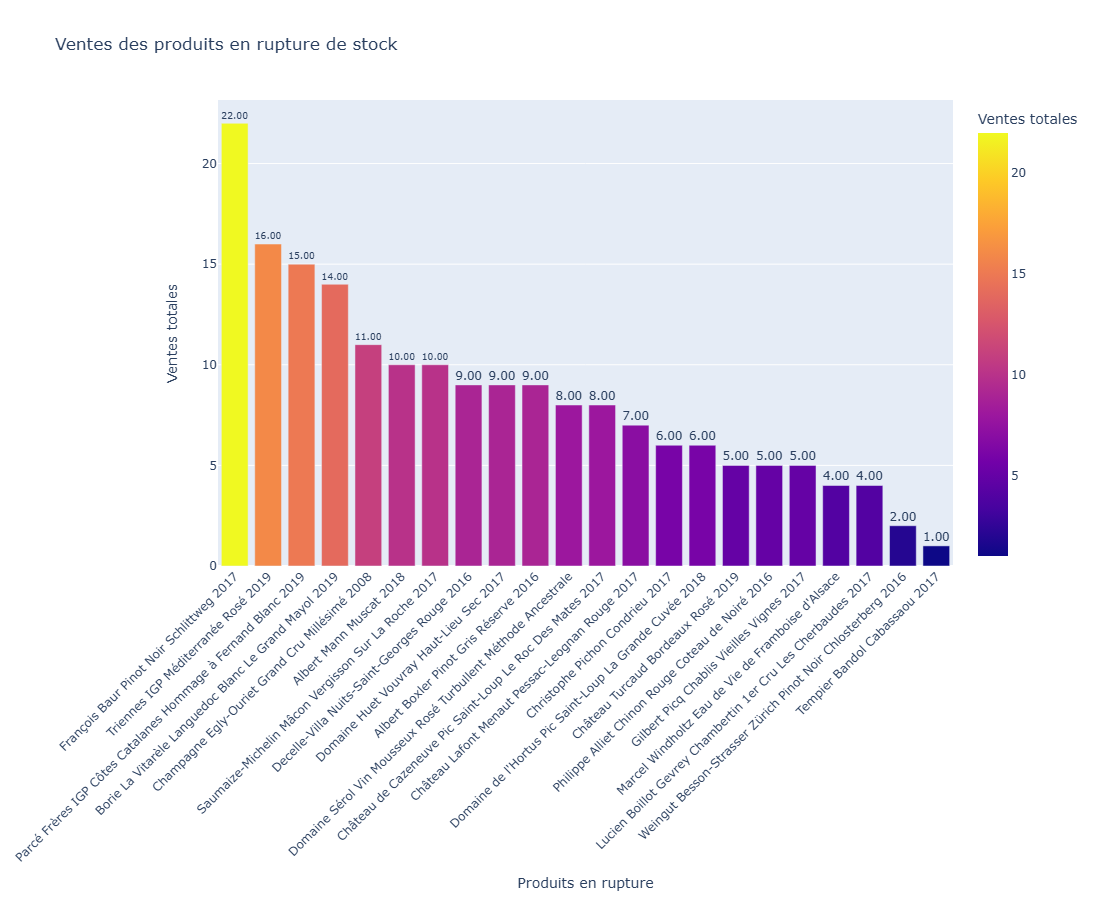

In [165]:
# Afficher les types uniques dans la colonne 'post_title'
unique_types = df_final['post_title'].apply(type).unique()
print(unique_types)

# Remplacer NaN par une chaîne vide
df_final['post_title'] = df_final['post_title'].fillna('Unknown')

# S'assurer que tout est en string
df_final['post_title'] = df_final['post_title'].astype(str)

out_of_stock_sales = out_of_stock[out_of_stock['total_sales'] > 0]
out_of_stock_sorted = out_of_stock_sales.sort_values(by='total_sales', ascending=False)

fig = px.bar(
    out_of_stock_sorted,
    x='post_title',
    y='total_sales',
    labels={'post_title': 'Produits en rupture', 'total_sales': 'Ventes totales'},
    title='Ventes des produits en rupture de stock',
    color='total_sales',
    text='total_sales'  # Optionnel : affiche les valeurs sur les barres
)

# Personnalisation de l'affichage
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)  # Rotation des étiquettes sur l'axe x

# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
    xaxis_title='Produits en rupture', 
    yaxis_title='Ventes totales',
    xaxis_tickangle=-45  # Incliner les étiquettes des produits pour une meilleure lisibilité
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("produit_rupture_stock.png", format='png', width=1000, height=900, scale=3)


# Afficher le graphique
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.7.2 - Exemple de combinaison de critères pour déterminer le meilleur produit</h3>
</div>

<div style="border: 1px solid RGB(247,10,10);" >
<h3 style="margin: auto; padding: 14px; color: RGB(247,10,10); font-size:12px;">
Pour déterminer le meilleur produit en combinant plusieurs critères, nous pouvons créer un score composite qui intègre les différents aspects que nous souhaitons évaluer. Voici comment procéder :

+ Choix des critères

    Voici quelques critères que nous pourrions combiner :

     - Total des ventes (total_sales) : Plus il est élevé, mieux c'est.
     - Taux de marge (taux_de_marge) : Un taux plus élevé est préférable.
     - Stock disponible (stock_quantity) : Avoir un stock disponible peut être important, mais il faut aussi tenir compte des ventes.


+ Normalisation des critères

    Pour combiner ces critères, il est souvent nécessaire de les normaliser pour qu'ils aient tous un impact comparable sur le score final. Nous pouvons utiliser la normalisation Min-Max pour chaque critère

+ Calcul du score composite

    Ensuite, nous pouvons attribuer des poids à chaque critère en fonction de leur importance relative. Par exemple, si nous pensons que les ventes sont deux fois plus importantes que la marge, nous pourrions attribuer les poids suivants :
        - Total des ventes : 0.4
        - Taux de marge : 0.4
        - Stock disponible : 0.2

RESUME
1. Calculer les critères nécessaires (taux de marge, total des ventes, etc.).
2. Normaliser les valeurs pour que chaque critère soit comparable.
3. Attribuer des poids selon leur importance.
4. Calculer un score composite pour chaque produit.
5. Identifier le produit avec le score le plus élevé.
Cela nous donnera un produit qui représente un bon équilibre entre les différents critères que nous avons choisis. Si nous souhaitons ajuster les poids ou les critères, nous pouvons le faire facilement dans le code.

</h3>
</div>

In [168]:
# Normaliser les critères
df_final['sales_norm'] = (df_final['total_sales'] - df_final['total_sales'].min()) / (df_final['total_sales'].max() - df_final['total_sales'].min())
df_final['margin_rate_norm'] = (df_final['taux_de_marge'] - df_final['taux_de_marge'].min()) / (df_final['taux_de_marge'].max() - df_final['taux_de_marge'].min())
df_final['stock_norm'] = (df_final['stock_quantity'] - df_final['stock_quantity'].min()) / (df_final['stock_quantity'].max() - df_final['stock_quantity'].min())

# Attribuer des poids aux critères
weights = {
    'sales_norm': 0.4,
    'margin_rate_norm': 0.4,
    'stock_norm': 0.2
}

# Calculer le score composite
df_final['score'] = (df_final['sales_norm'] * weights['sales_norm'] +
                     df_final['margin_rate_norm'] * weights['margin_rate_norm'] +
                     df_final['stock_norm'] * weights['stock_norm'])

# Identifier le meilleur produit
best_product = df_final.loc[df_final['score'].idxmax()]
print("Meilleur produit basé sur les critères combinés:")
print(best_product)


Meilleur produit basé sur les critères combinés:
product_id_erp                                                     4867
onsale_web                                                         True
price                                                               9.9
stock_quantity                                                      121
stock_status                                                    instock
purchase_price                                                     4.86
product_id_web                                                    16148
total_sales                                                        36.0
tax_status                                                      taxable
product_type                                                        Vin
post_title            Château De La Selve IGP Coteaux de l'Ardèche M...
z_score                                                       -0.841163
CA_article                                                        356.4
Rotation_stock 

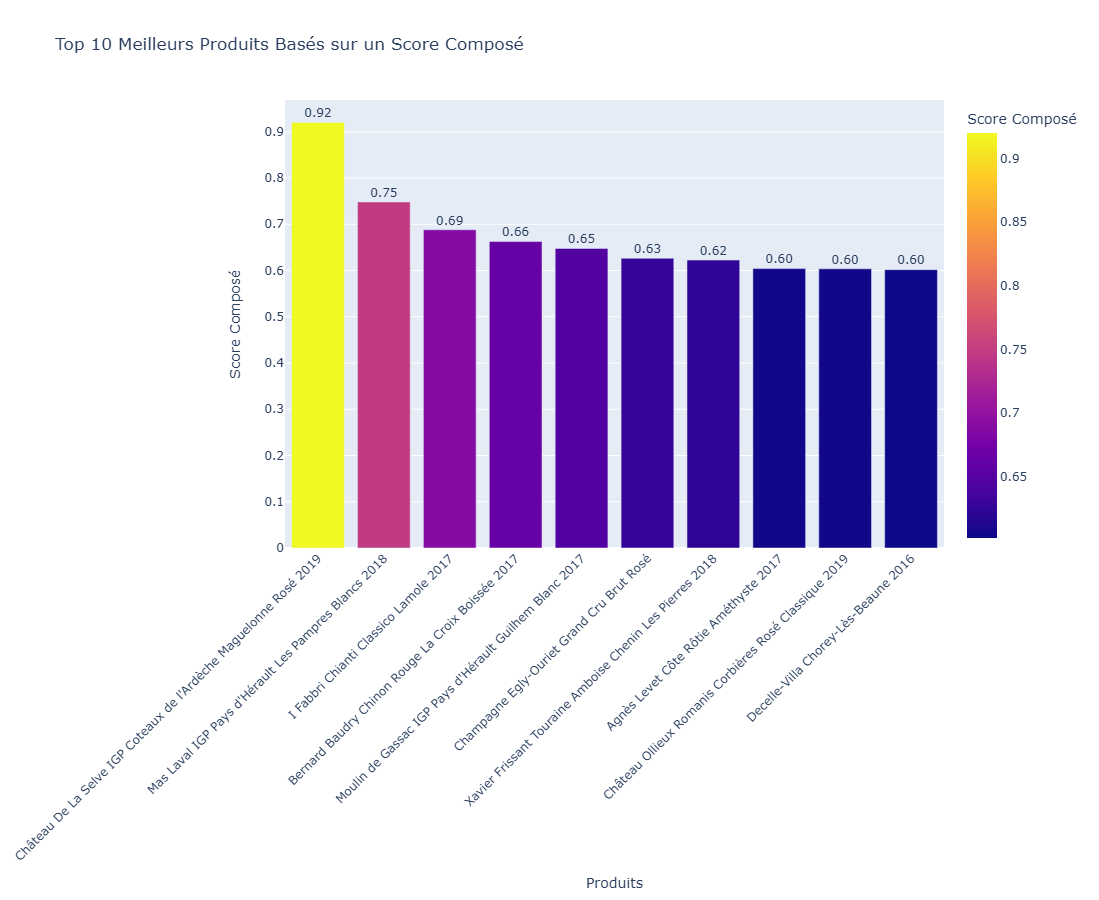

In [169]:
# Graphique des 10 meilleurs produits selon les critères sélectionnés

# Identifier les 10 meilleurs produits
top_products = df_final.nlargest(10, 'score')

# Créer le graphique avec Plotly
fig = px.bar(top_products, 
             x='post_title', 
             y='score', 
             title='Top 10 Meilleurs Produits Basés sur un Score Composé',
             labels={'post_title': 'Produits', 'score': 'Score Composé'},
             color='score',
             text='score')

# Afficher le graphique
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Produits',
                  yaxis_title='Score Composé',
                  xaxis_tickangle=-45)
# Agrandir le graphique
fig.update_layout(
    height=900,      # Hauteur du graphique
    width=1000,       # Largeur du graphique
)

# Exporter le graphique avec les annotations au format PNG
fig.write_image("top_10_meilleurs_articles.png", format='png', width=1000, height=900, scale=3)

fig.show()